In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import analysis_utils as aute

In [2]:
df_conv_row = pd.read_csv("Results/DataConvbyRow.csv", sep=";")

df_angry = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarAngry.csv", sep=",")
df_happy = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarHappy.csv", sep=",")
df_relax = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarRelax.csv", sep=",")
df_sad = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarSad.csv", sep=",")

interest_cuest_cols = [
    'Usuario', 'Question1', 'Question2',
    'Question3', 'Question4', 'Question5', 'Question6', 'Question7',
    'Question8', 'Disgusto', 'Felicidad', 'Enfado', 'Miedo', 'Relajado',
    'Sorpresa', 'Tristeza', 'Disgusto.1', 'Felicidad.1', 'Enfado.1',
    'Miedo.1', 'Relajado.1', 'Sorpresa.1', 'Tristeza.1'
]

### Merge conversations with the four personalities

In [3]:
df_conv_pers = df_conv_row[df_conv_row["BotPersonality"] != "Neutral"].reset_index(drop=True)
print("Shape", df_conv_pers.shape)

Shape (76, 46)


In [4]:
df_conv_pers

,SubjectId,ConfigName,BotPersonality,FirstDate,LastDate,ConvTime_s,AboveMaximumTime,NumConv,NumSamples,AllTextClean,...,PersonNumUniqWordsClean,PersonNumUniqWords,PersonOriginalText,PersonNumWords,PersonNumWordsClean,PersonNumQuestions,Mean_PersonTalk,Max_PersonTalk,Min_PersonTalk,Diff_PersonTalk
0,User_01_CB,Happy_Woman_1,Happy,1.668589e+09,1.668589e+09,123.356988,False,5,10,"encant conocerte, nombr mari nombre. hol buen ...",...,20,43,hola buenas yo me llamo Jesús encantado Yo soy...,66,32,0,9.411009,15.750861,6.265236,-3.125580
1,User_01_CB,Relax_Man_2,Relax,1.668589e+09,NaN,182.710761,False,7,15,"hola, nombr pabl nombre. hola, llam jesus gust...",...,23,60,"Hola, yo me llamo Jesús te gusta la playa, qué...",106,49,2,9.390276,15.737232,6.210278,3.124682
2,User_01_CB,Sad_Woman_2,Sad,1.668590e+09,NaN,138.772165,False,8,17,"hola, llam sar tu. hola, sar jesus hac buen di...",...,18,43,"Hola, Sara yo soy Jesús hace un buen día, no?....",70,34,1,7.026681,9.435585,6.209277,0.030921
3,User_01_CB,Angry_Man_1,Angry,1.668590e+09,NaN,122.044762,False,5,11,"nombr jorg llamas. hola, llam jesus. enfad can...",...,23,45,"hola, yo me llamo Jesús. Y no has pensado en c...",65,33,1,8.156119,12.621134,6.251256,-0.008949
4,User_02_CB,Happy_Man_1,Happy,1.668597e+09,NaN,207.373702,False,13,27,"encant conocerte, nombr javi nombre. hol javi ...",...,17,34,hola Javier soy Elena. de aquí de la ciudad. d...,64,35,0,6.967394,9.403758,6.217256,-0.040328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,User_18_CB,Happy_Woman_2,Happy,1.669377e+09,NaN,232.713992,False,13,27,"encant conocerte, nombr mari nombre. hola, mar...",...,20,45,"Hola, mi nombre es clara.. Muchas gracias, soy...",83,46,2,6.234937,6.312784,6.202177,-0.110607
72,User_19_CB,Angry_Woman_2,Angry,1.669384e+09,NaN,202.529334,False,8,17,nombr mart llamas. judith. llam mart 31 anos. ...,...,24,58,"cómo Judith. Ah, bueno, lo siento mucho, pero ...",108,47,0,10.170512,15.704931,6.216352,-0.018945
73,User_19_CB,Happy_Man_1,Happy,1.669385e+09,1.669385e+09,275.761385,True,14,28,"encant conocerte, nombr javi nombre. llam judi...",...,51,103,"yo me llamo Judith. Si soy de Valencia bien, h...",206,94,1,9.615273,15.732973,6.210380,-0.012812
74,User_19_CB,Relax_Woman_1,Relax,1.669385e+09,1.669385e+09,290.592365,True,13,26,"hola, nombr luci nombre. hola, llam judith. ho...",...,54,98,"hola, yo me llamo Judith. Realmente yo vivo en...",183,93,2,8.919964,15.767791,6.209354,-0.002738


In [5]:
df_happy_merge = pd.merge(df_conv_pers[df_conv_pers["BotPersonality"] == "Happy"], df_happy, 
                          left_on="SubjectId", right_on="Usuario")
print("Happy merge", df_happy_merge.shape)

df_sad_merge = pd.merge(df_conv_pers[df_conv_pers["BotPersonality"] == "Sad"], df_sad, 
                          left_on="SubjectId", right_on="Usuario")
print("Sad merge", df_sad_merge.shape)

df_relax_merge = pd.merge(df_conv_pers[df_conv_pers["BotPersonality"] == "Relax"], df_relax, 
                          left_on="SubjectId", right_on="Usuario")
print("Relax merge", df_relax_merge.shape)

df_angry_merge = pd.merge(df_conv_pers[df_conv_pers["BotPersonality"] == "Angry"], df_angry, 
                          left_on="SubjectId", right_on="Usuario")
print("Angry merge", df_angry_merge.shape)

Happy merge (18, 79)
Sad merge (18, 79)
Relax merge (18, 79)
Angry merge (18, 79)


In [6]:
df_cp = pd.concat([df_happy_merge, df_sad_merge, df_relax_merge, df_angry_merge]).reset_index(drop=True)

ANOVA P-value 0.01064835366418395 with significance *
KS P-value 0.006668846028113762 with significance **

P-value 0.01064835366418395 with significance *


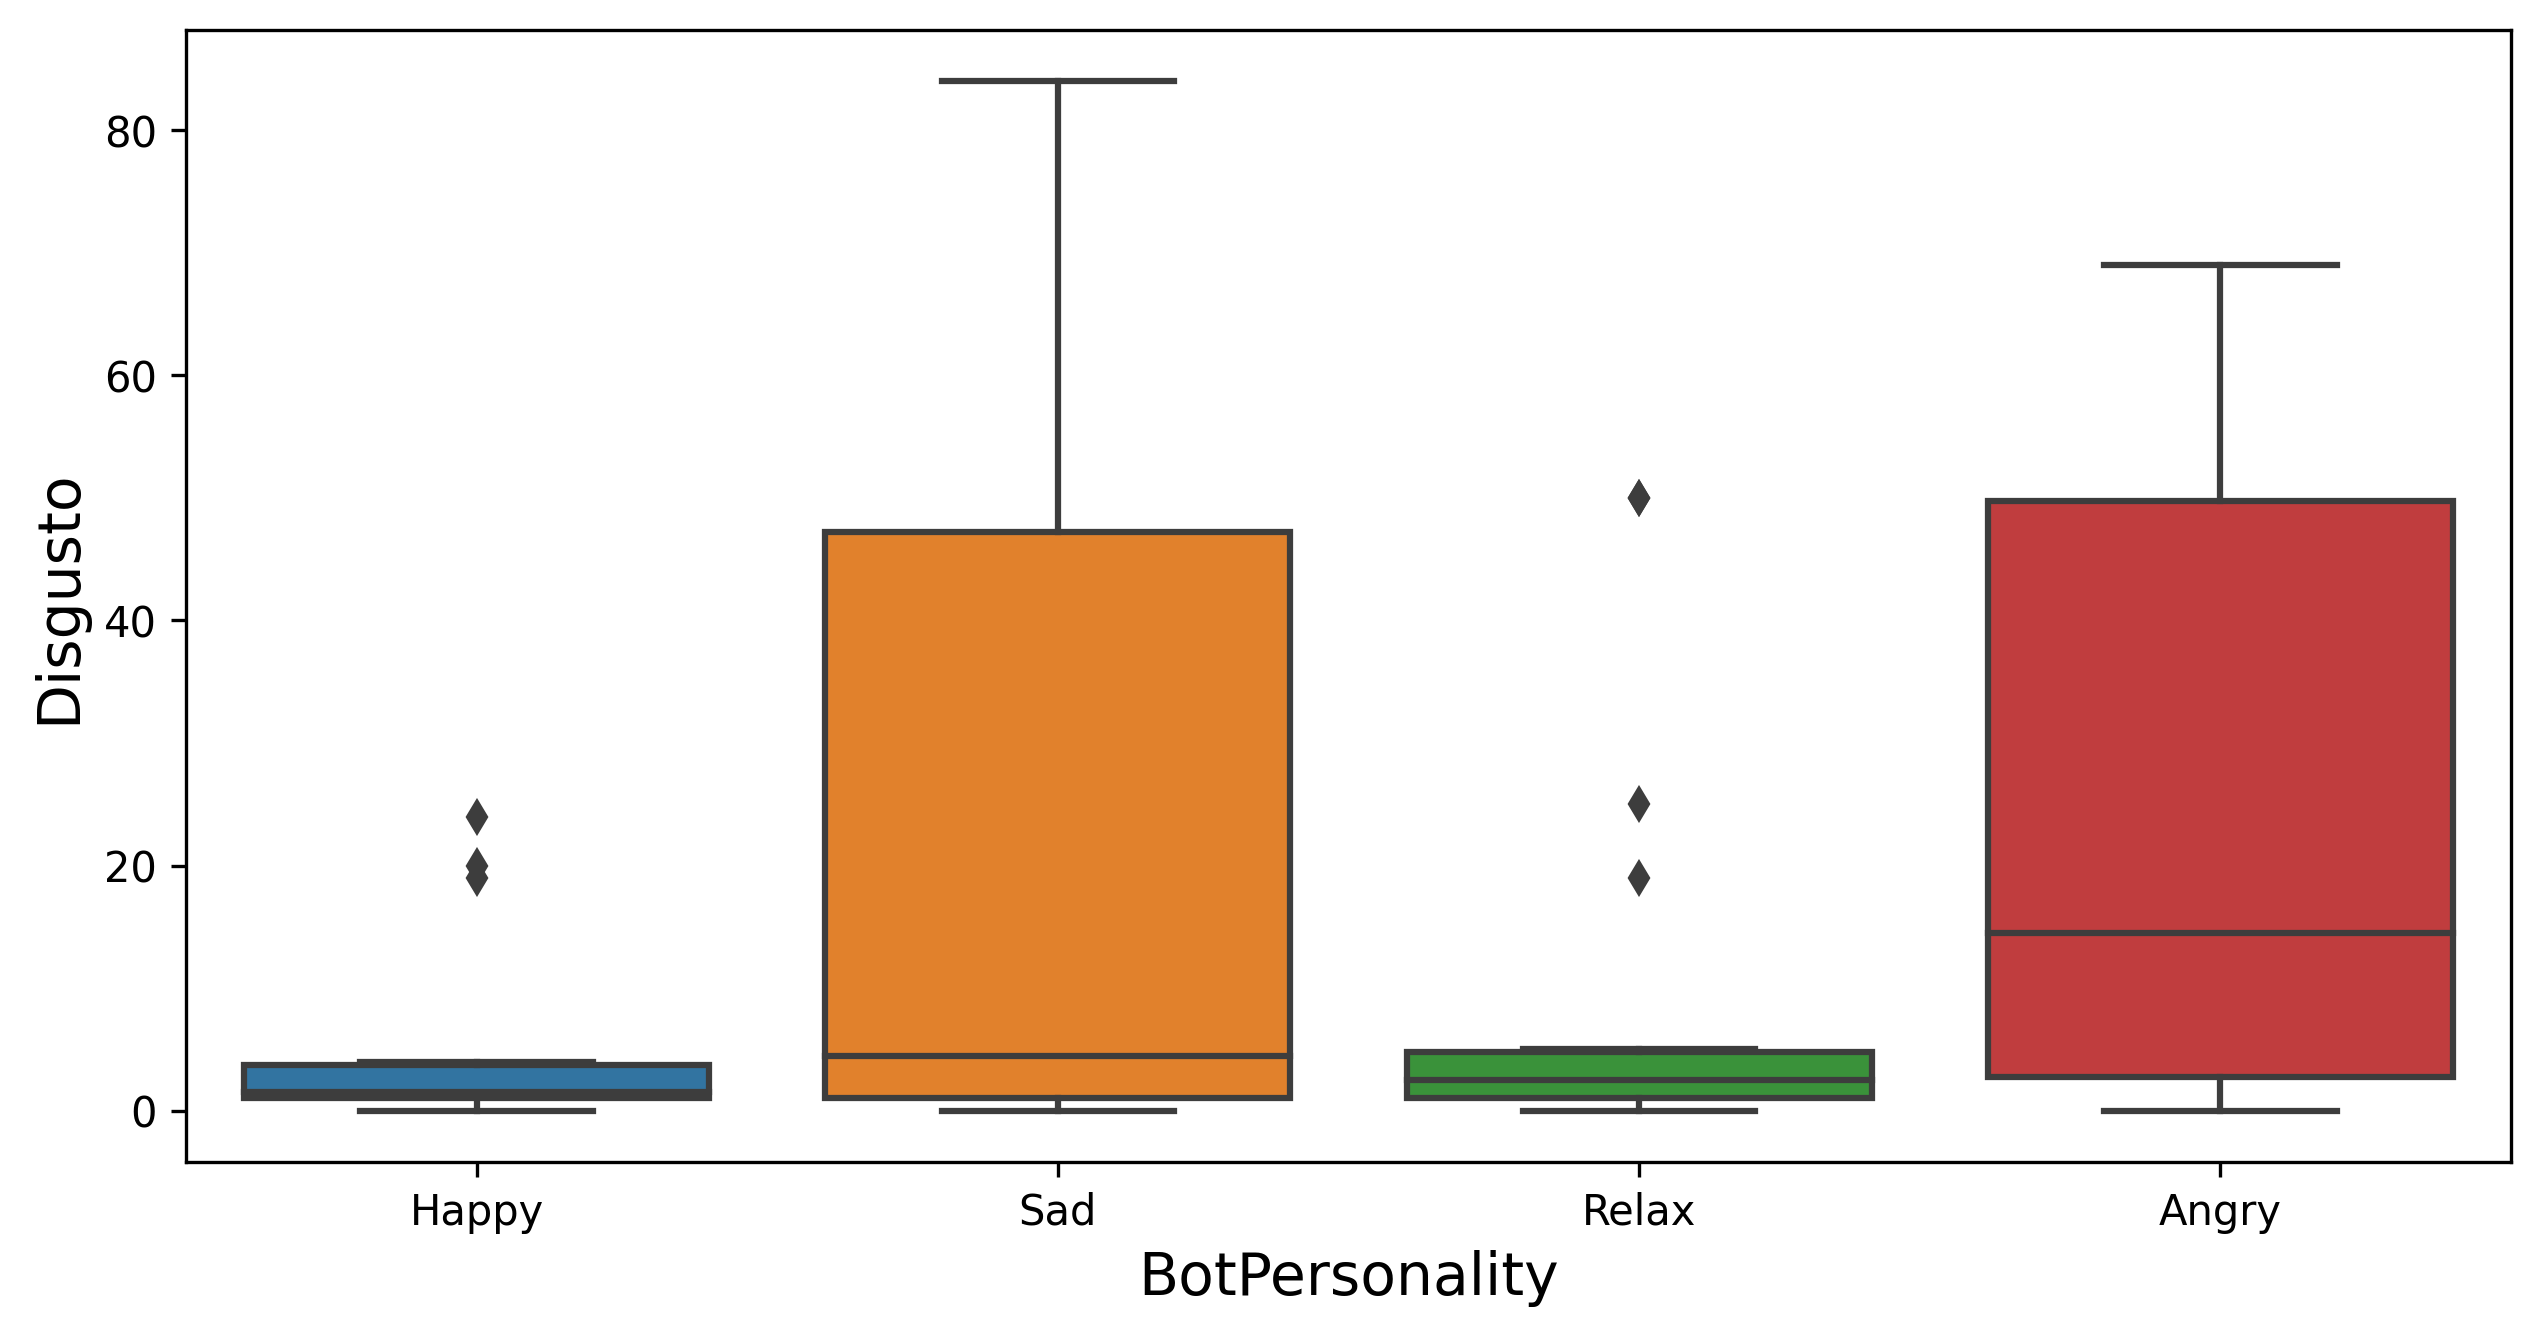

ANOVA P-value 9.010538201021032e-06 with significance ***
KS P-value 0.0004292590546831847 with significance ***

P-value 9.010538201021032e-06 with significance ***


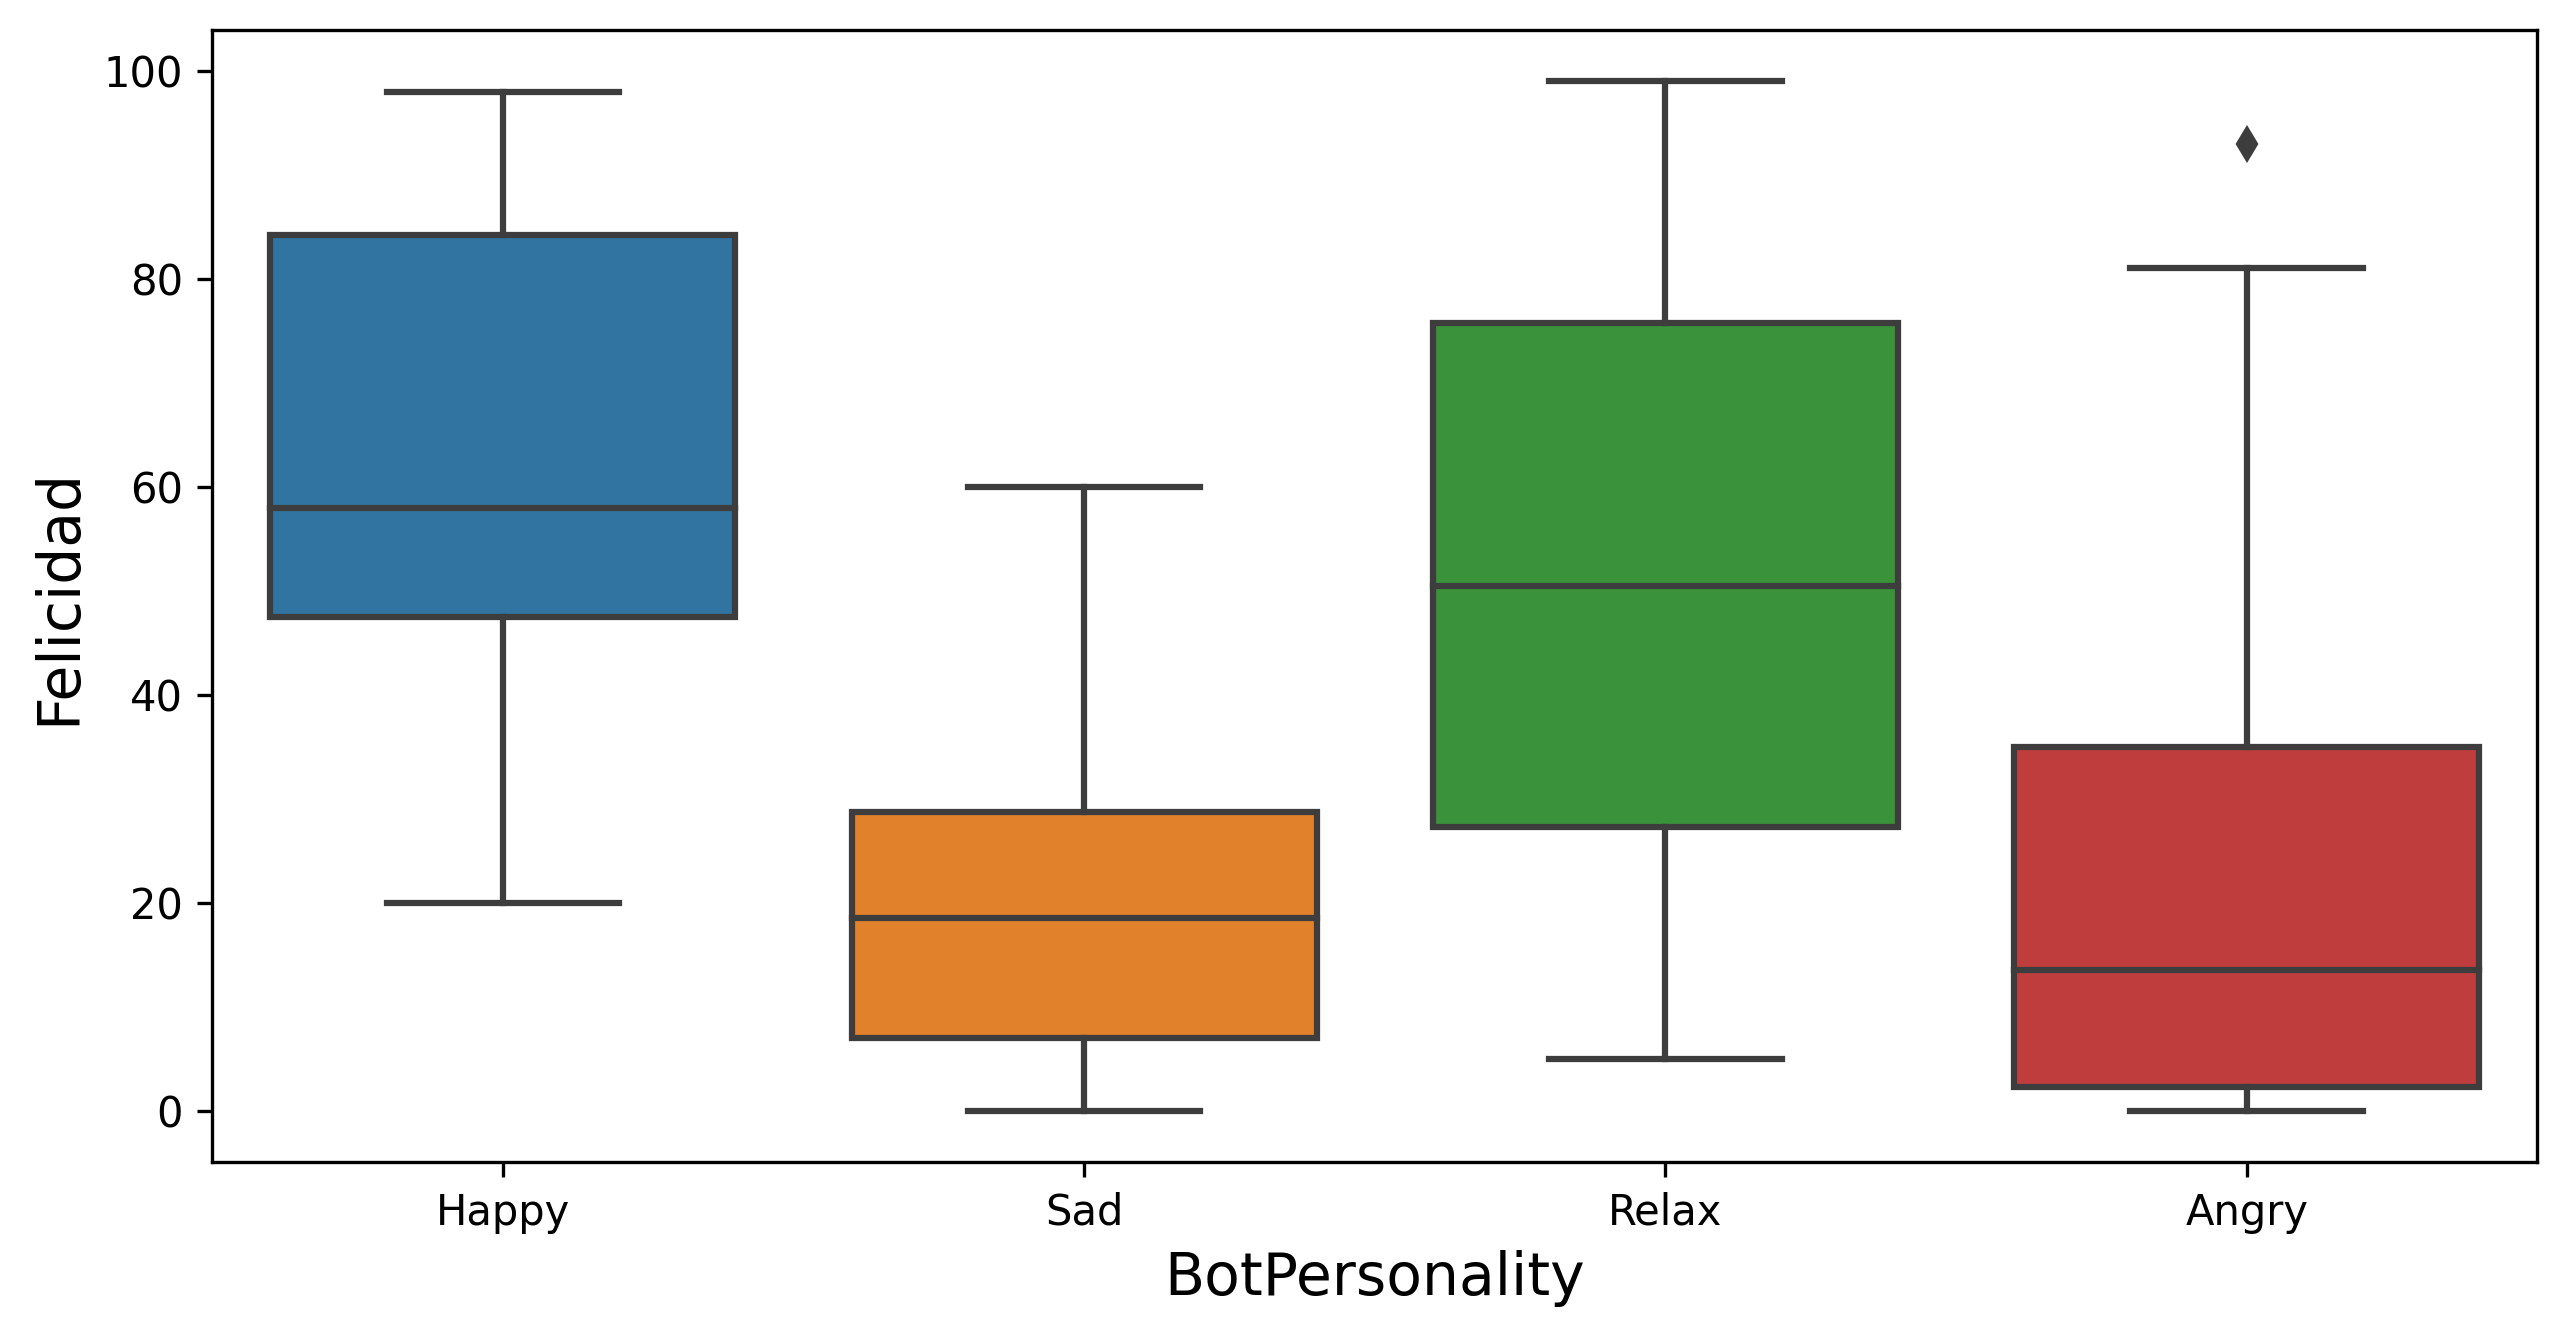

ANOVA P-value 0.016337795203498373 with significance *
KS P-value 0.05601816779525039 with significance -

P-value 0.016337795203498373 with significance *


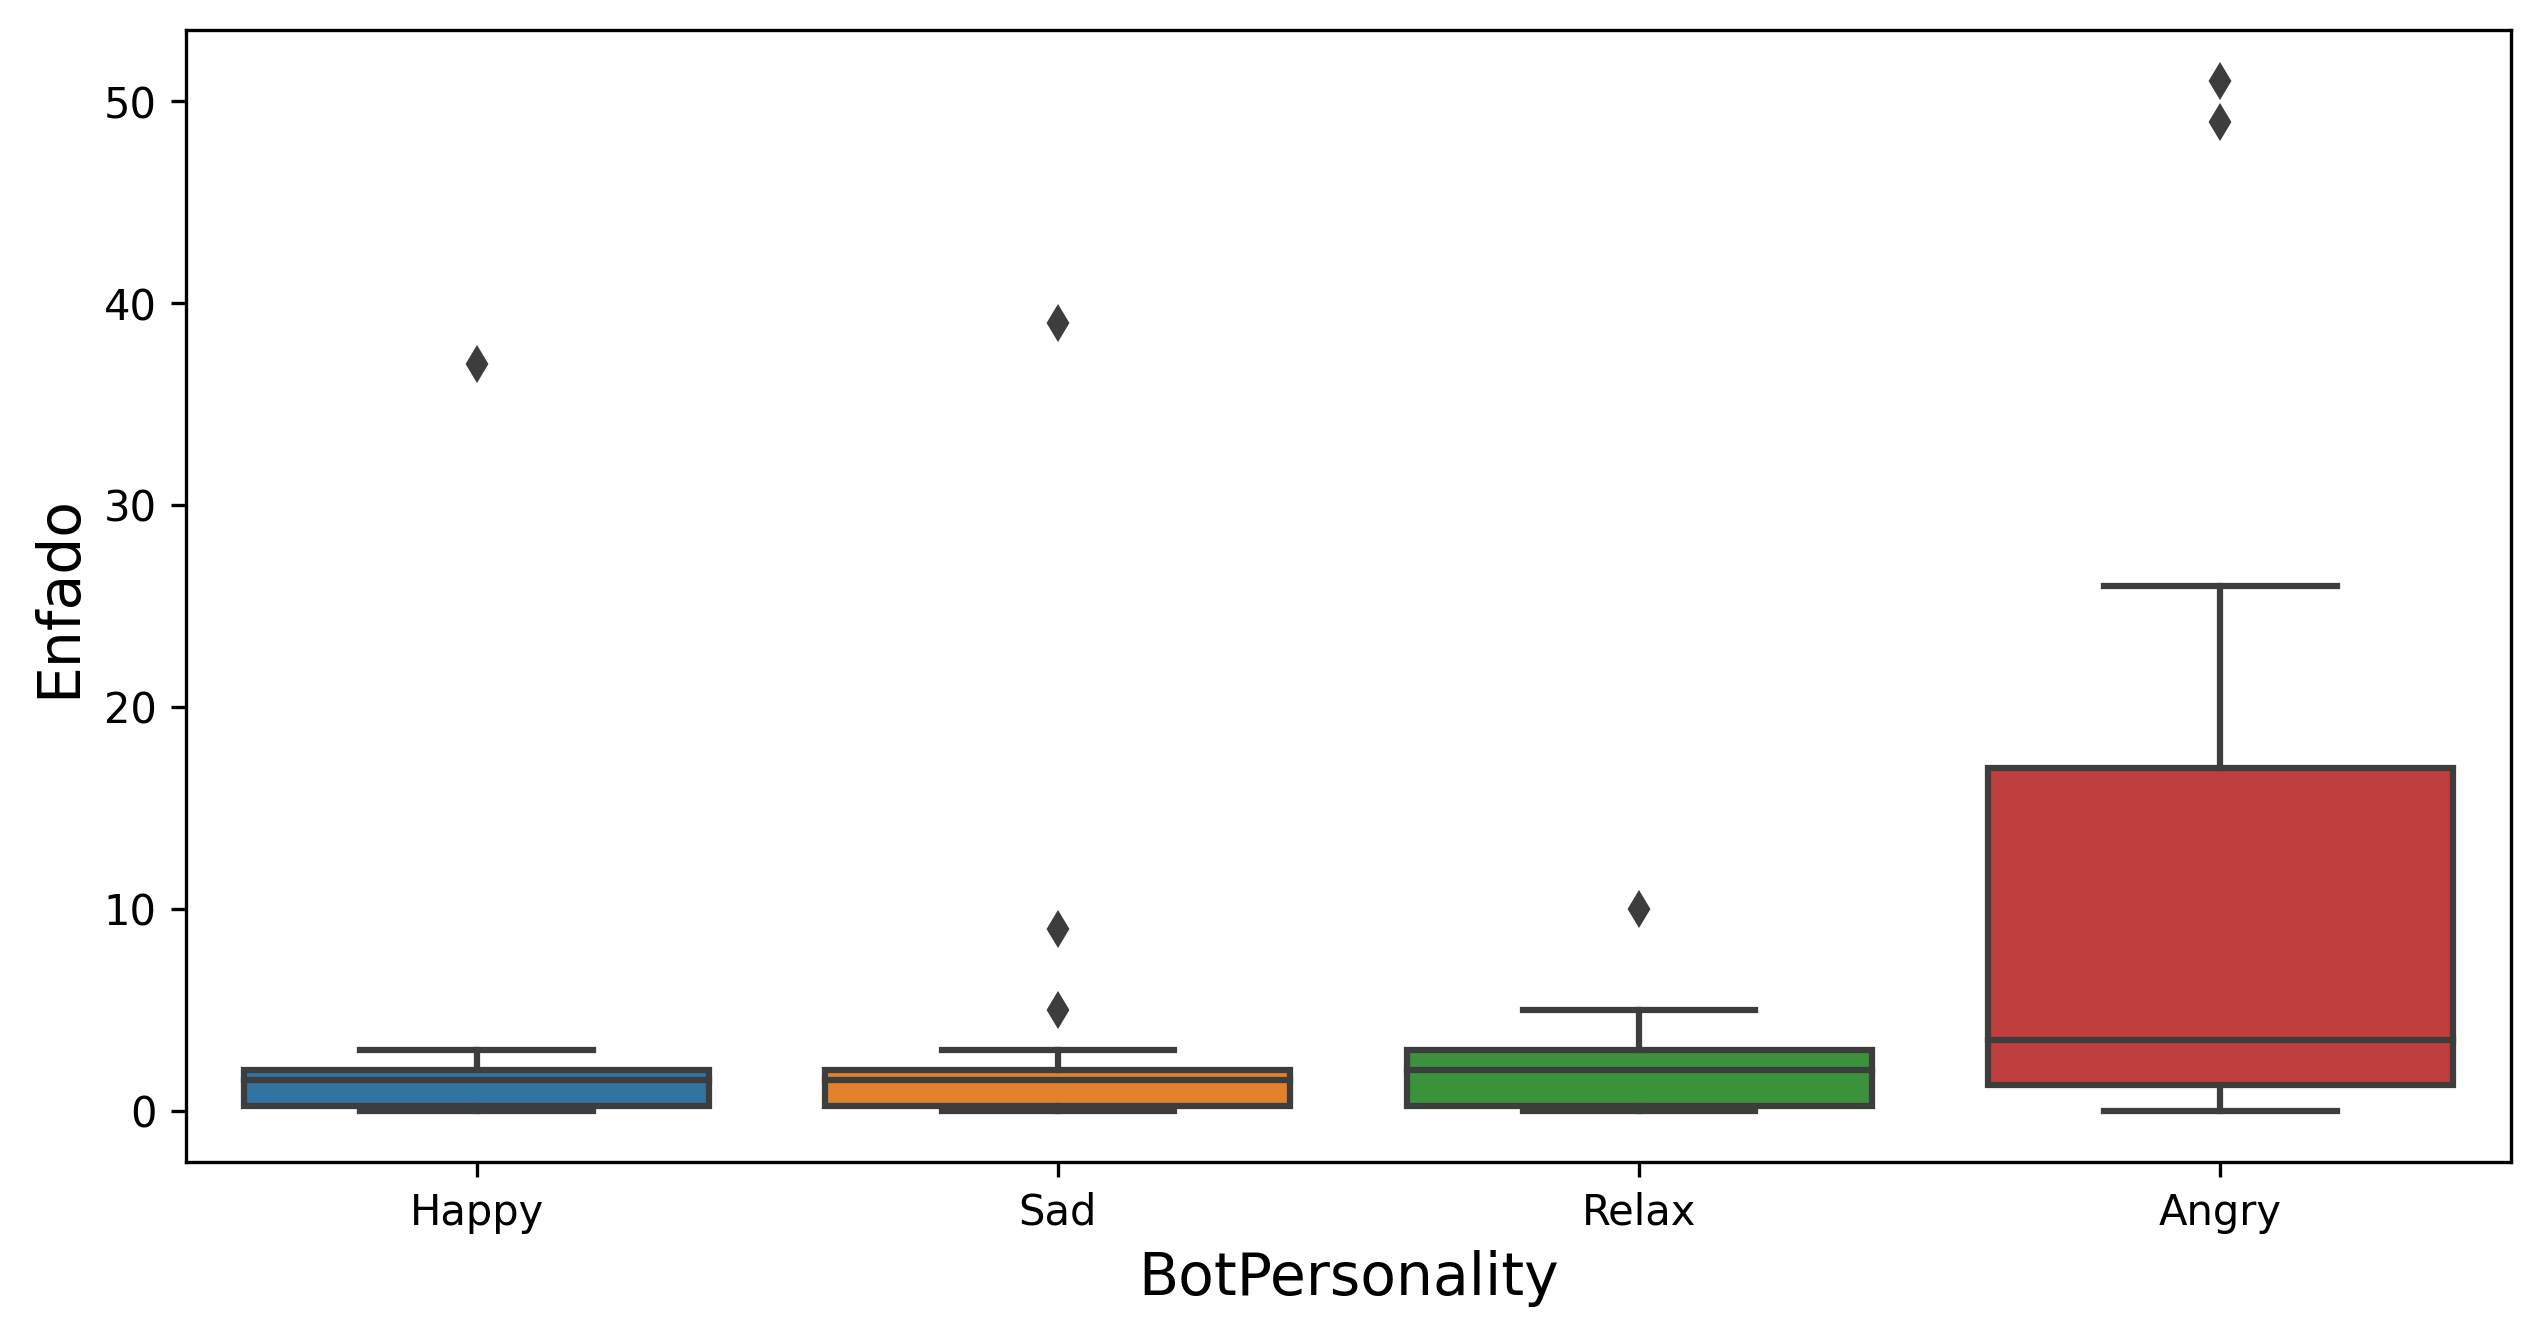

ANOVA P-value 1.7570849610169293e-05 with significance ***
KS P-value 0.05601816779525039 with significance -

P-value 1.7570849610169293e-05 with significance ***


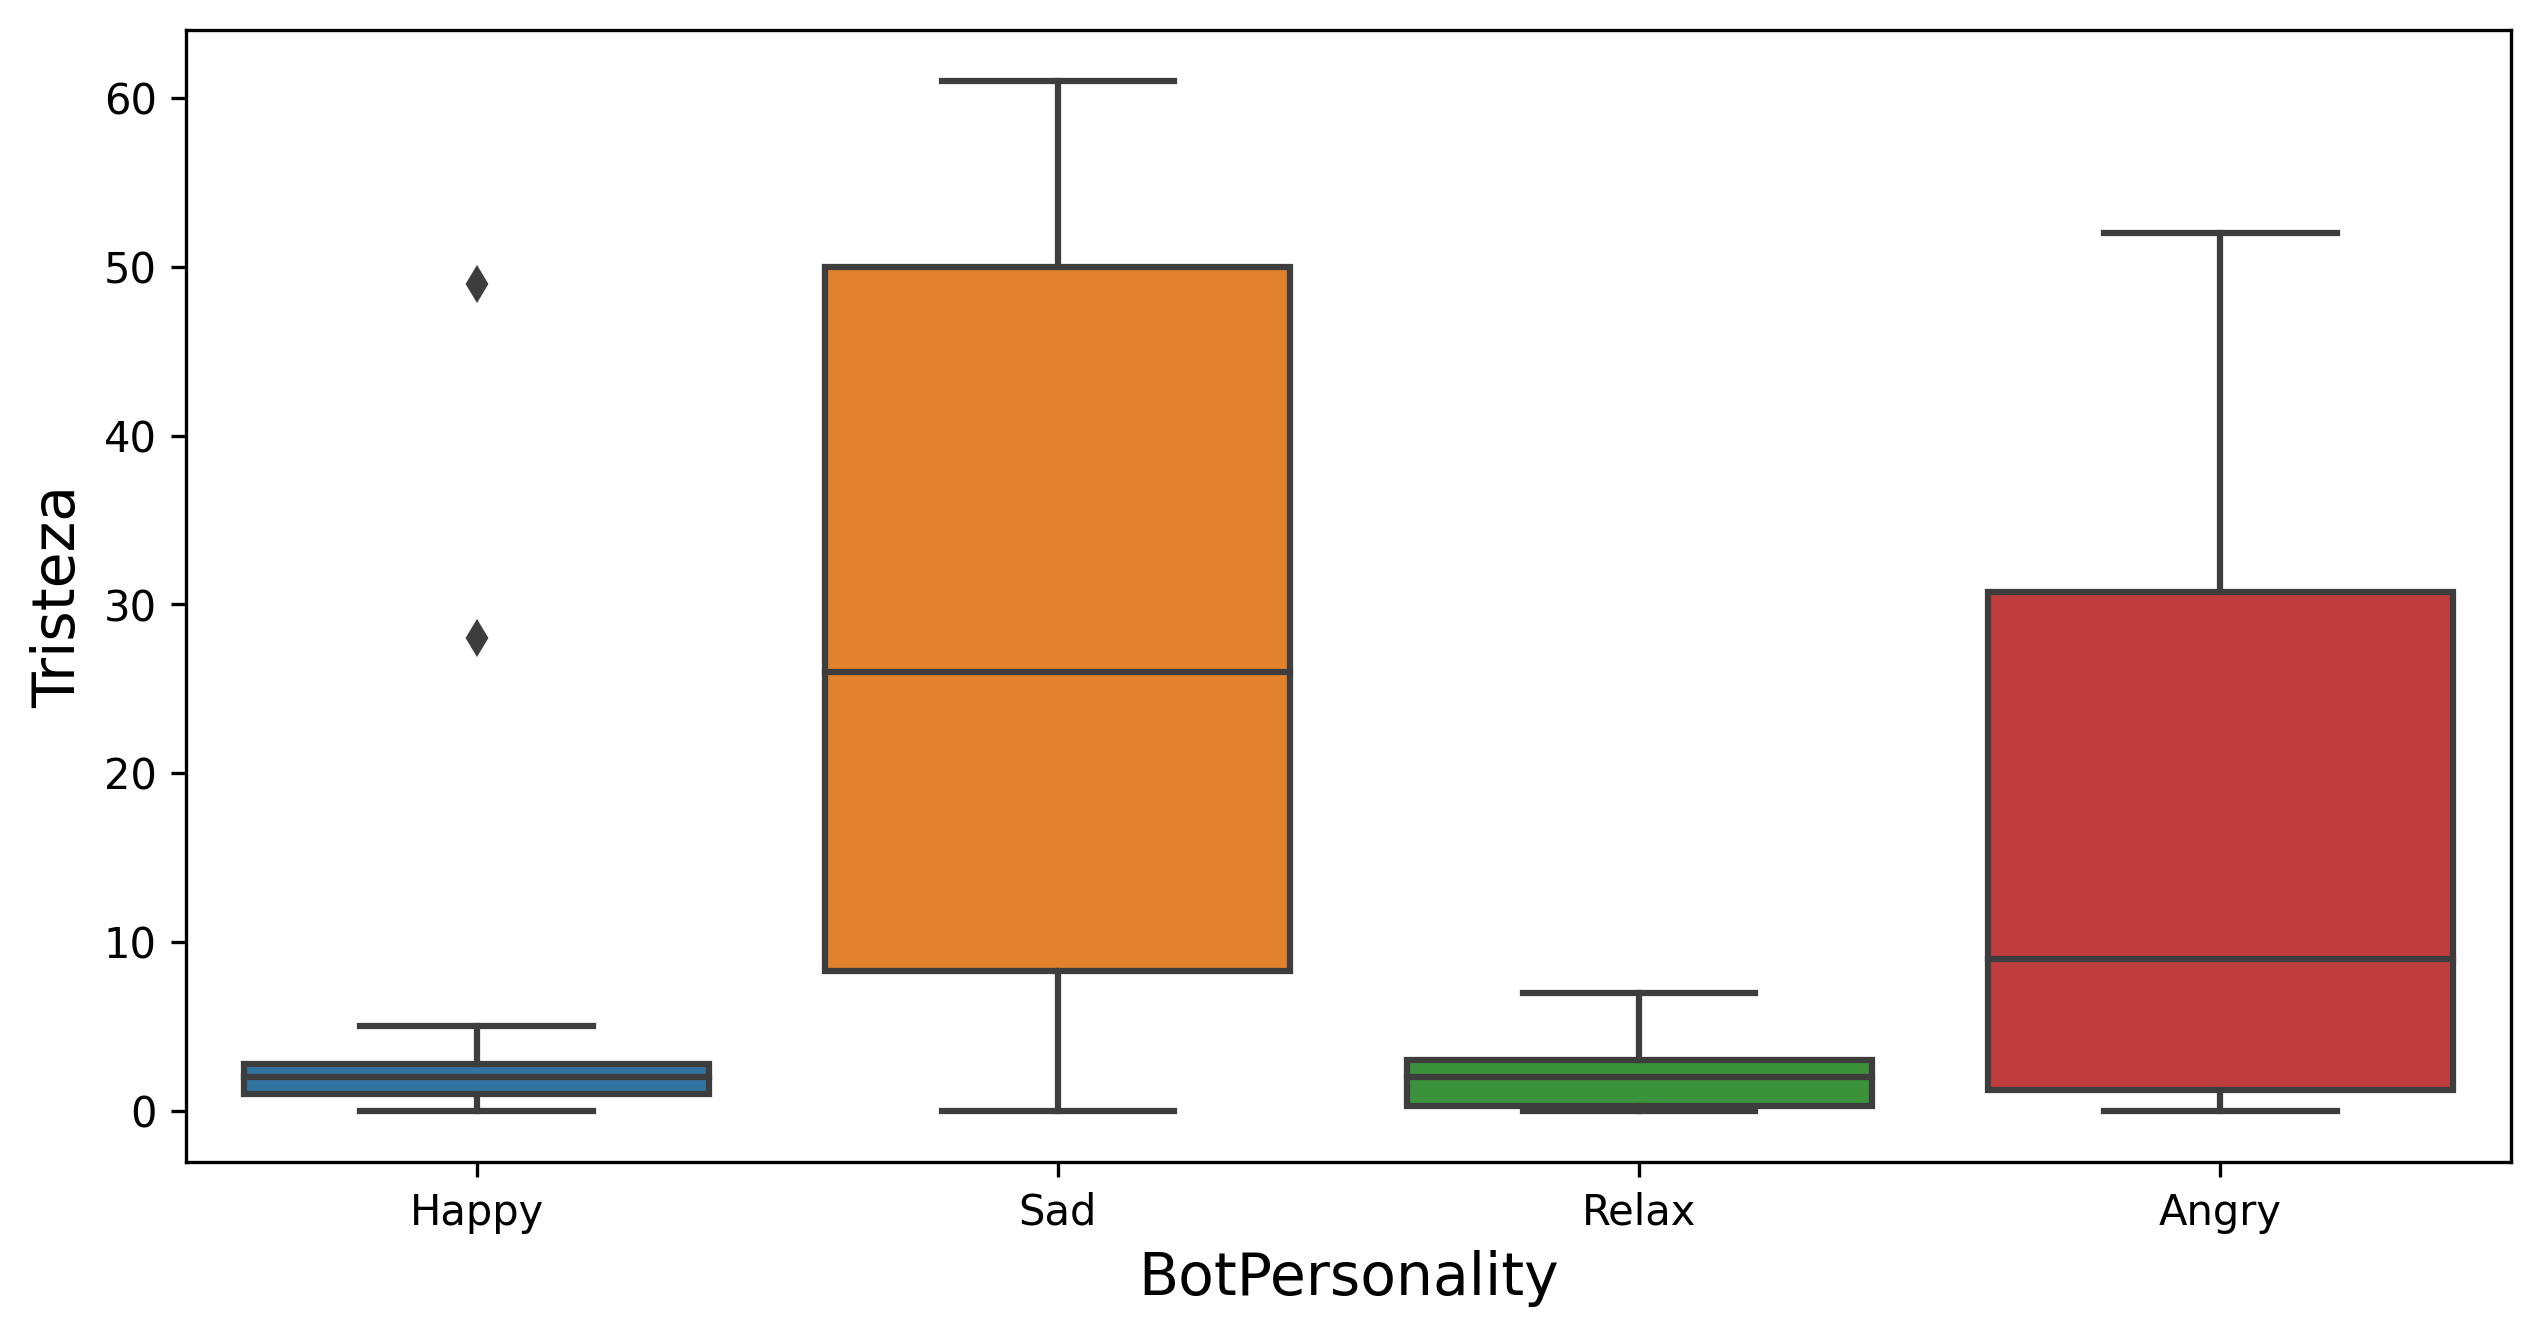

ANOVA P-value 5.2560720840948685e-09 with significance ***
KS P-value 1.5735302591025833e-06 with significance ***

P-value 5.2560720840948685e-09 with significance ***


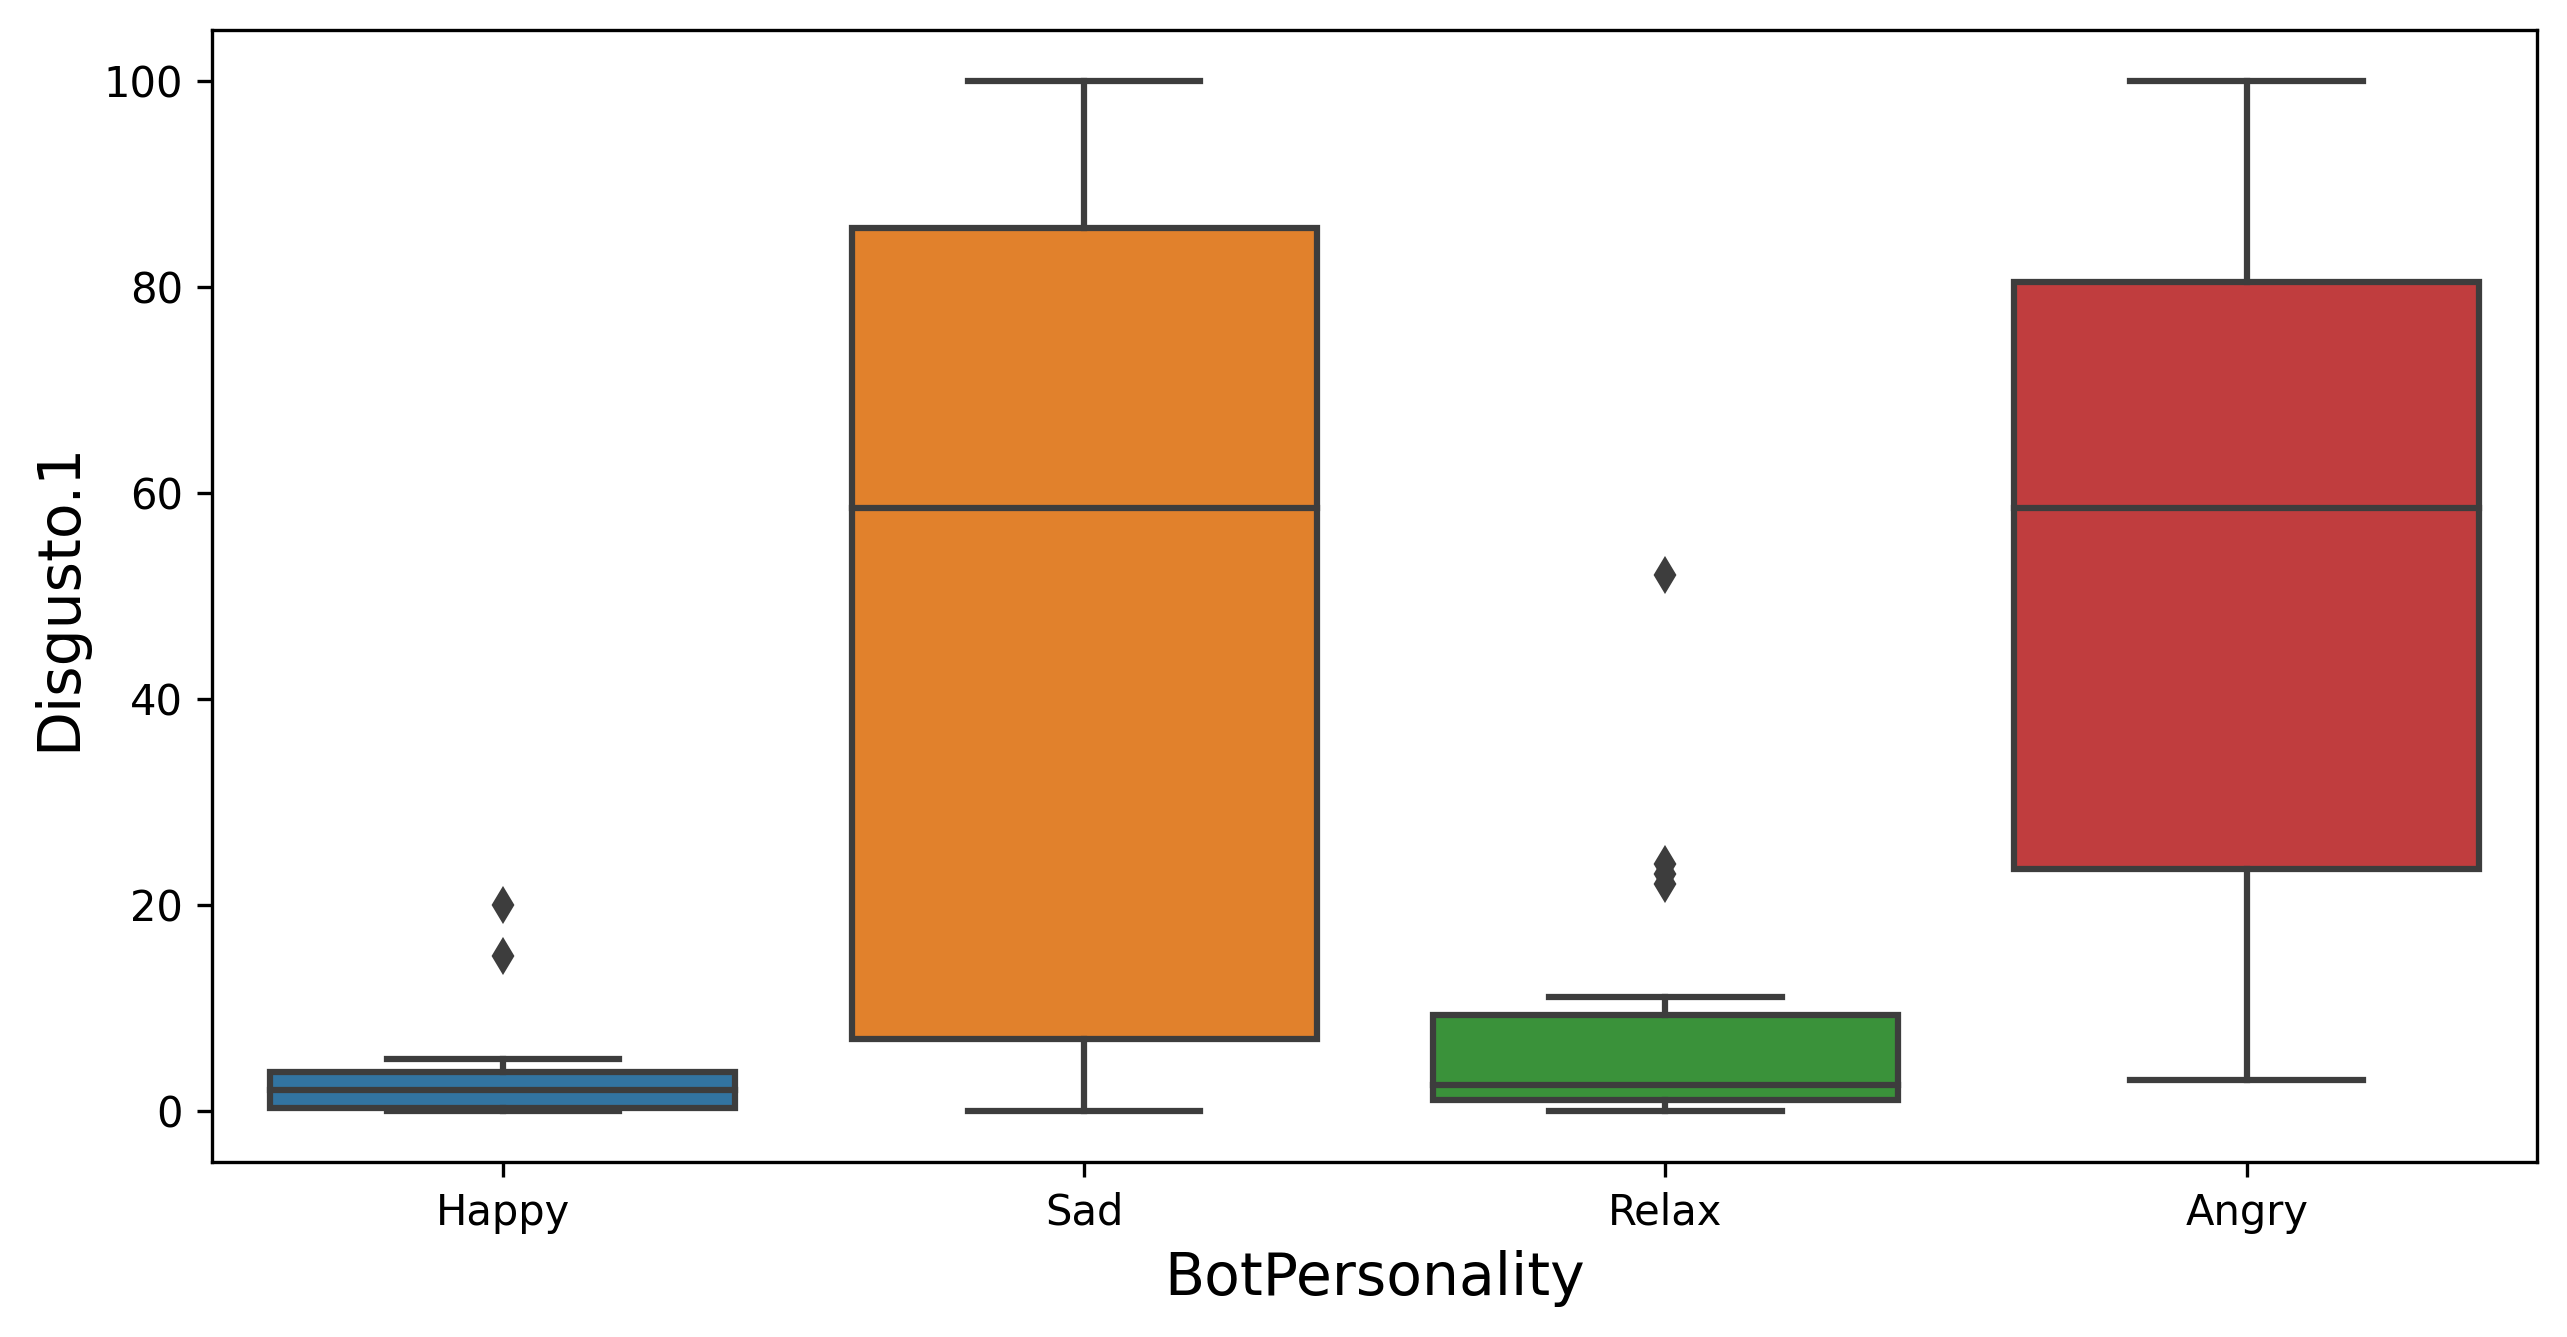

ANOVA P-value 5.211180471090594e-15 with significance ***
KS P-value 1.3884090521493383e-07 with significance ***

P-value 5.211180471090594e-15 with significance ***


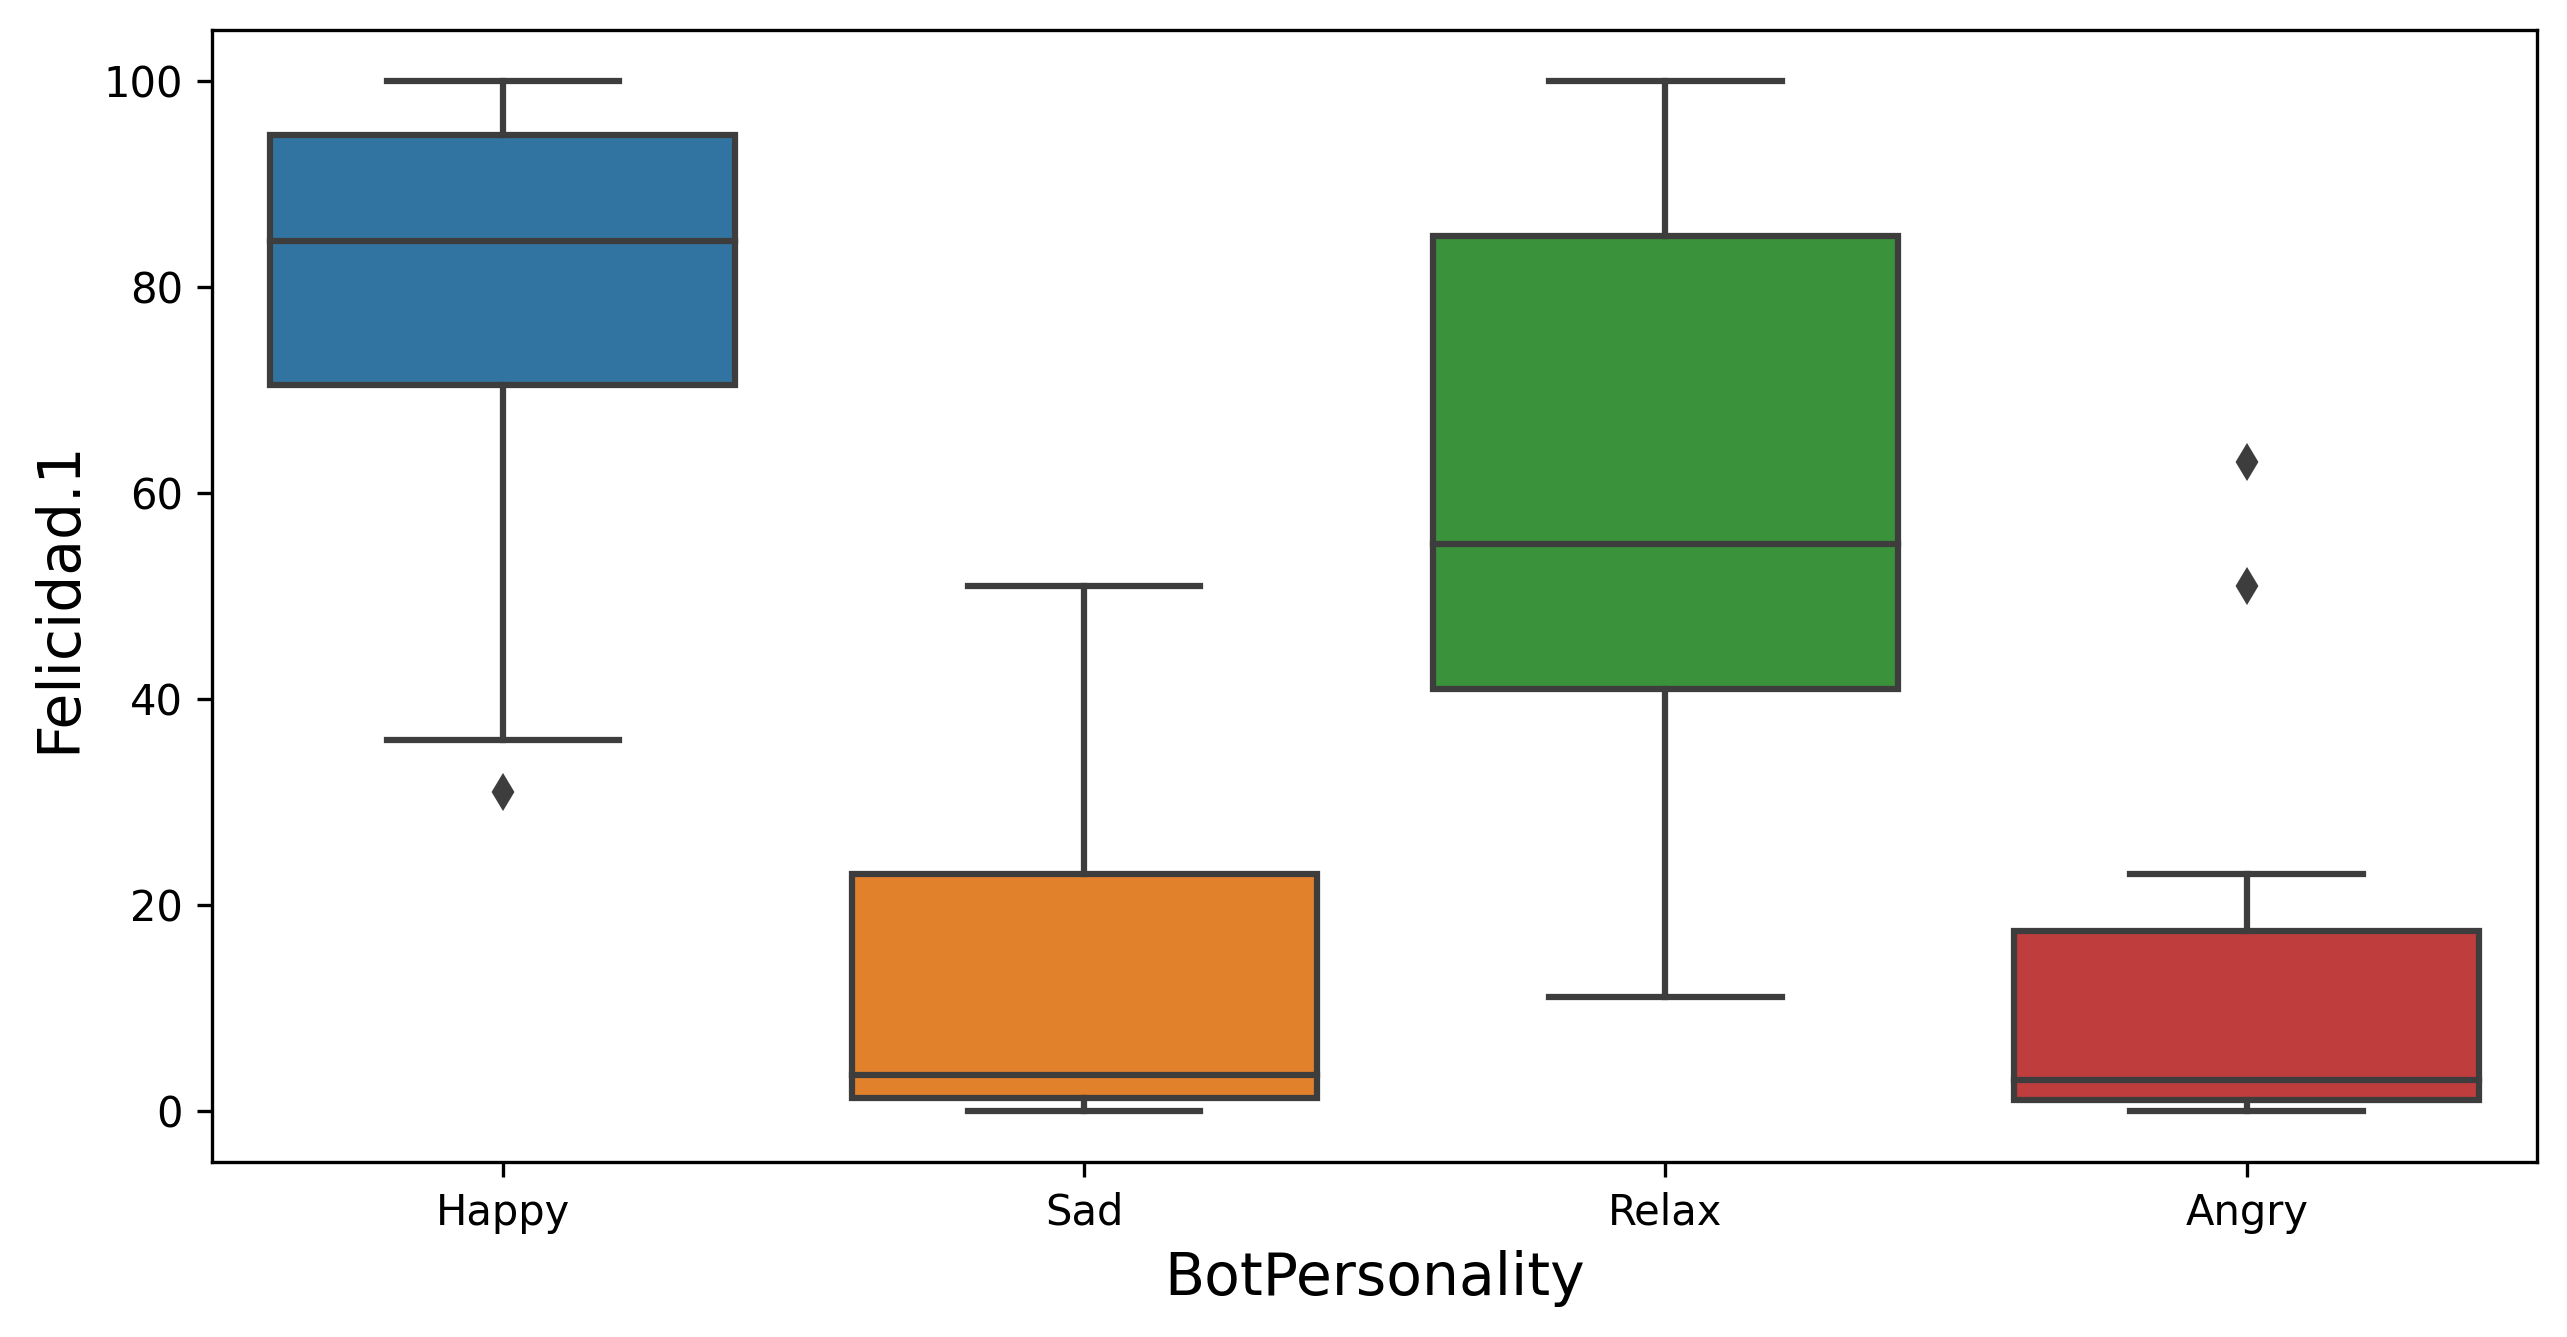

ANOVA P-value 5.280536096816849e-19 with significance ***
KS P-value 2.2038238923005368e-10 with significance ***

P-value 5.280536096816849e-19 with significance ***


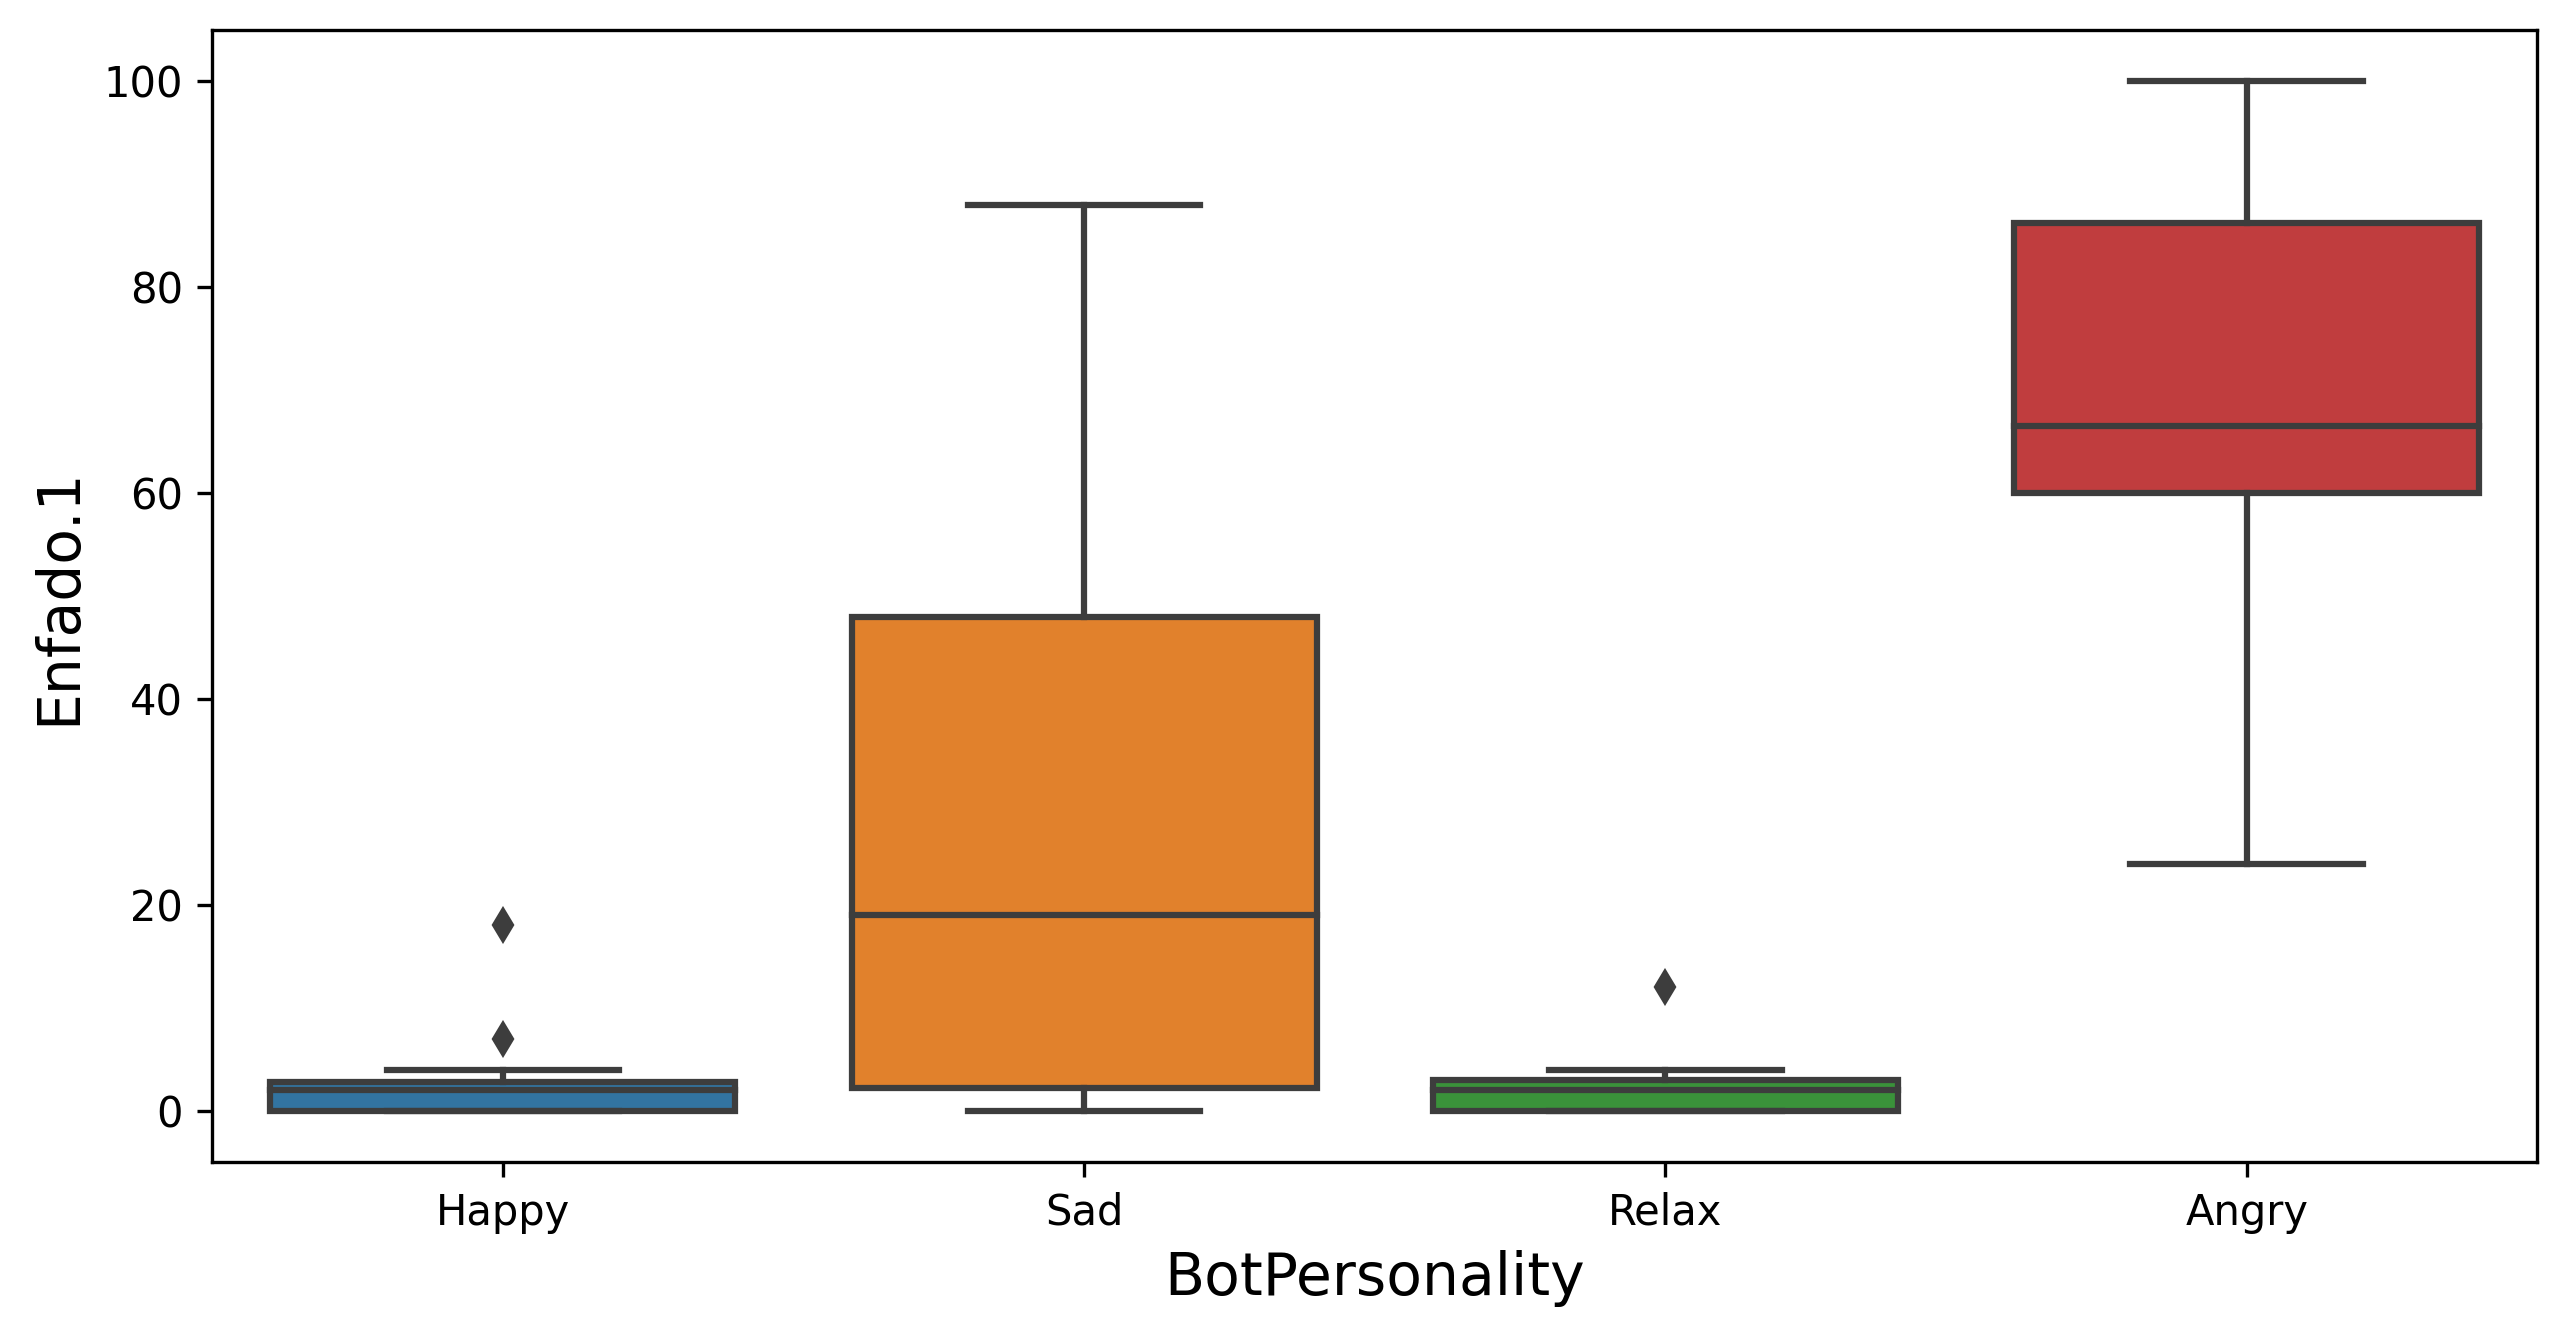

ANOVA P-value 9.740830515364225e-05 with significance ***
KS P-value 0.5025900605581054 with significance -

P-value 9.740830515364225e-05 with significance ***


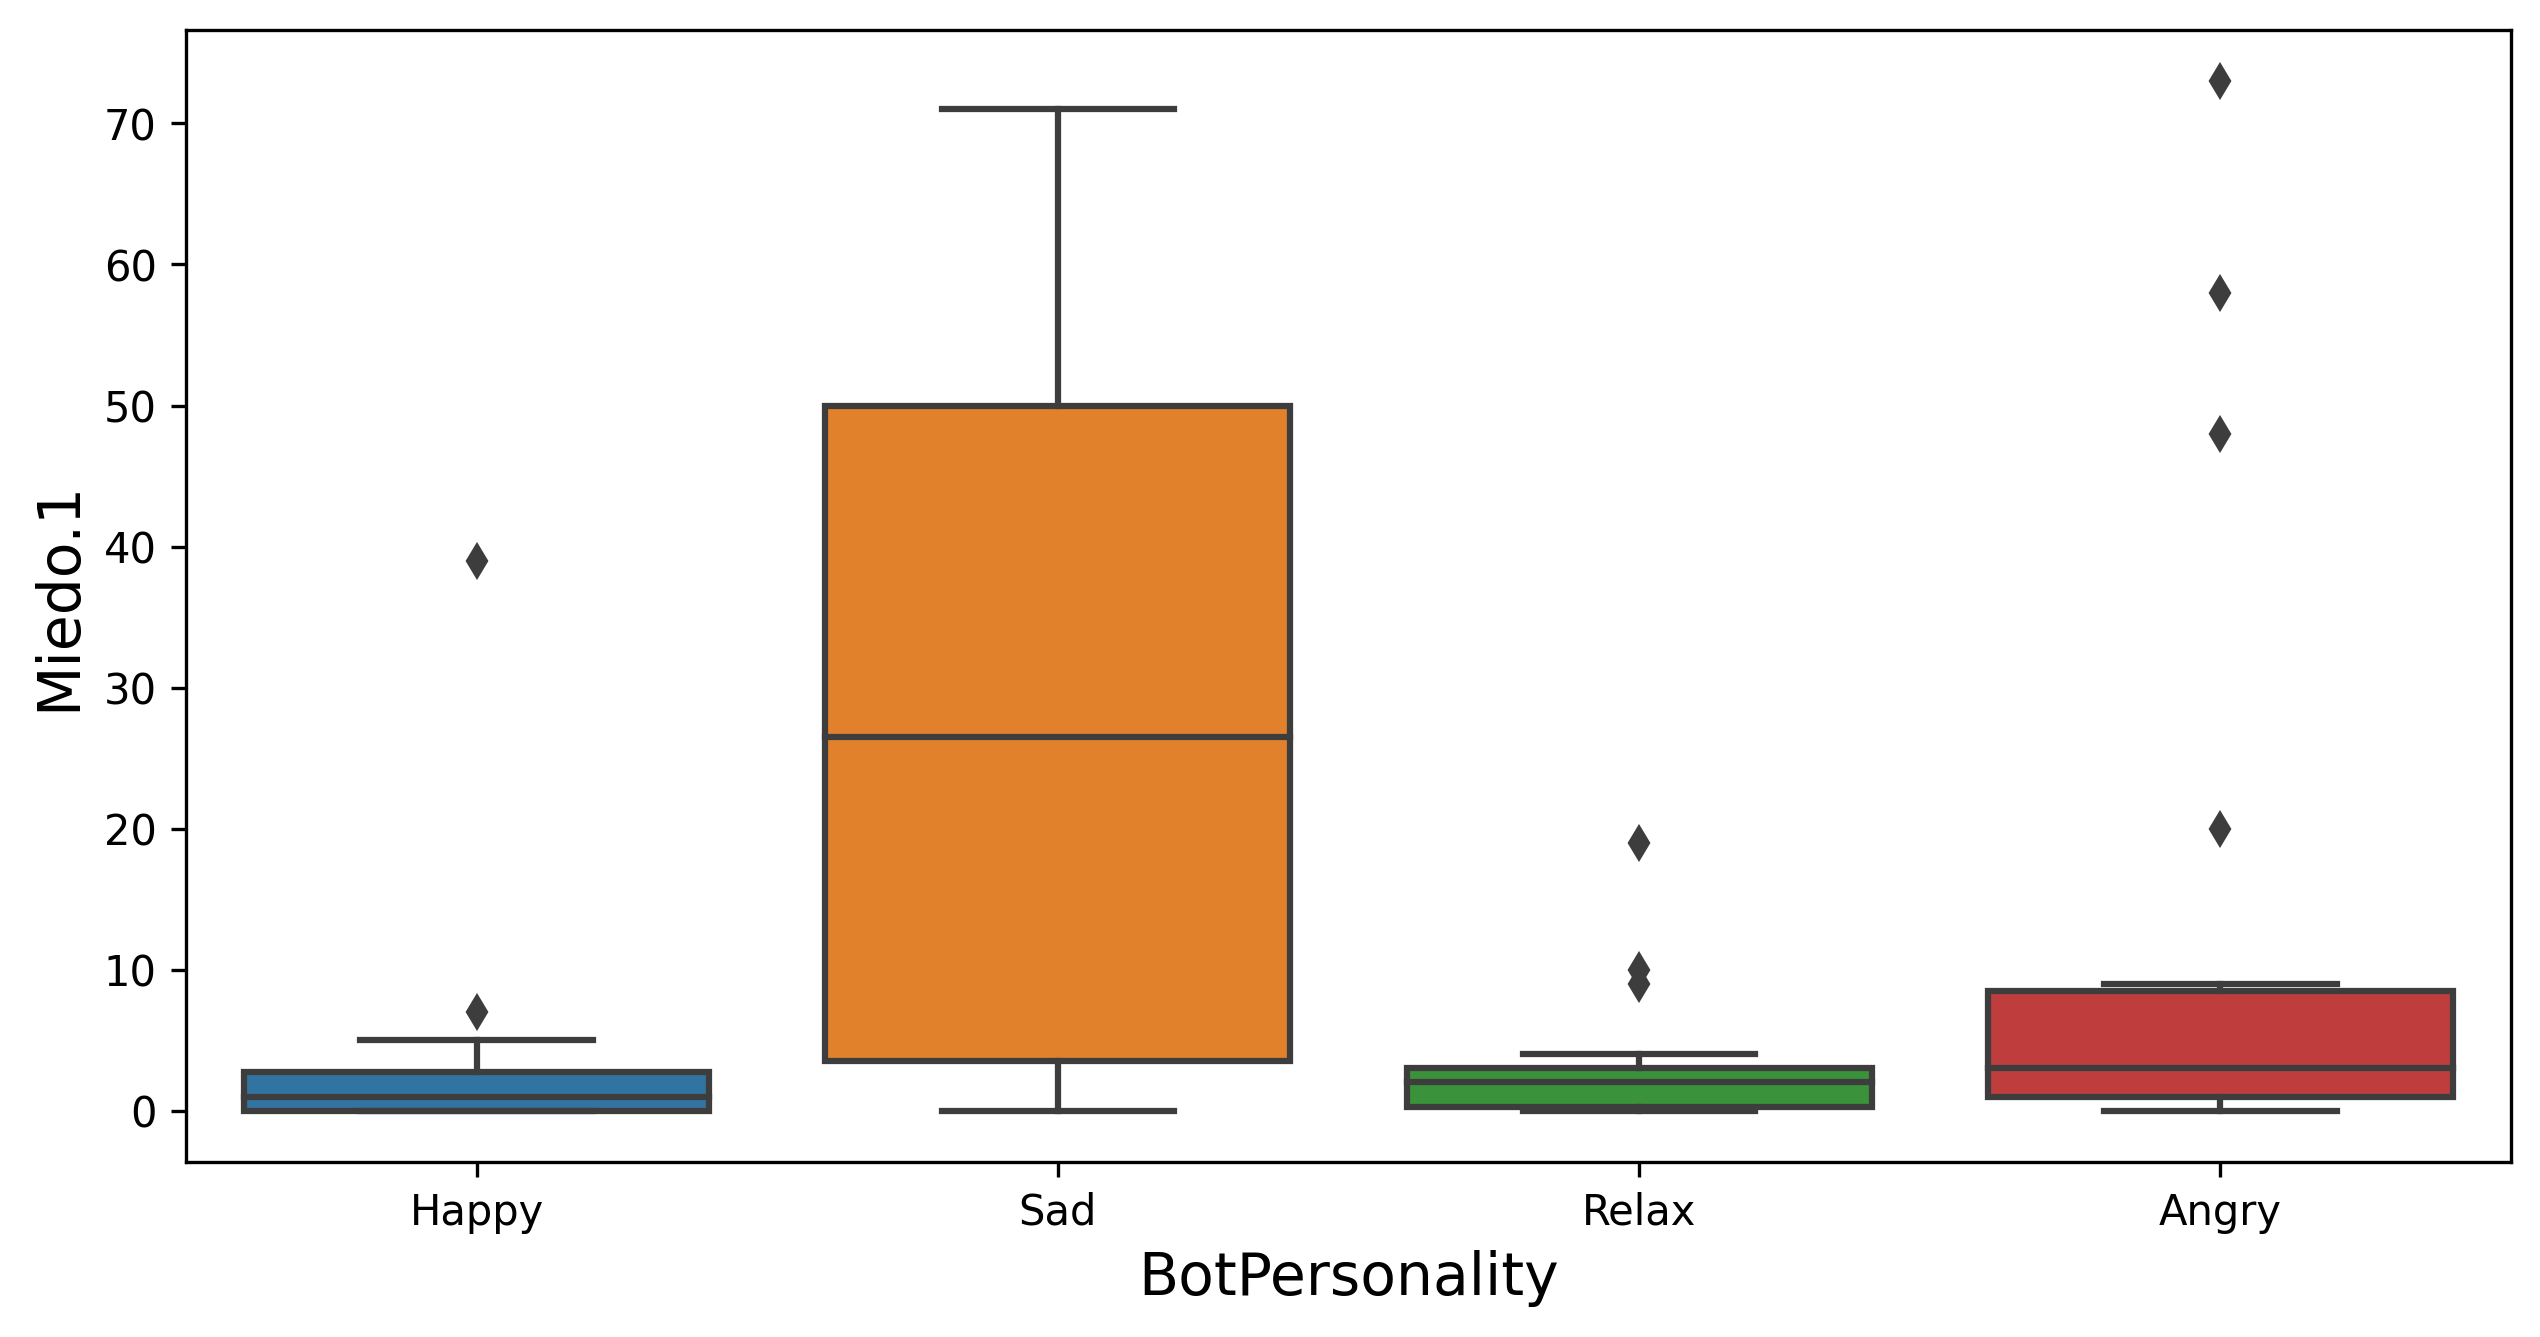

ANOVA P-value 5.760970159947576e-07 with significance ***
KS P-value 0.0004292590546831847 with significance ***

P-value 5.760970159947576e-07 with significance ***


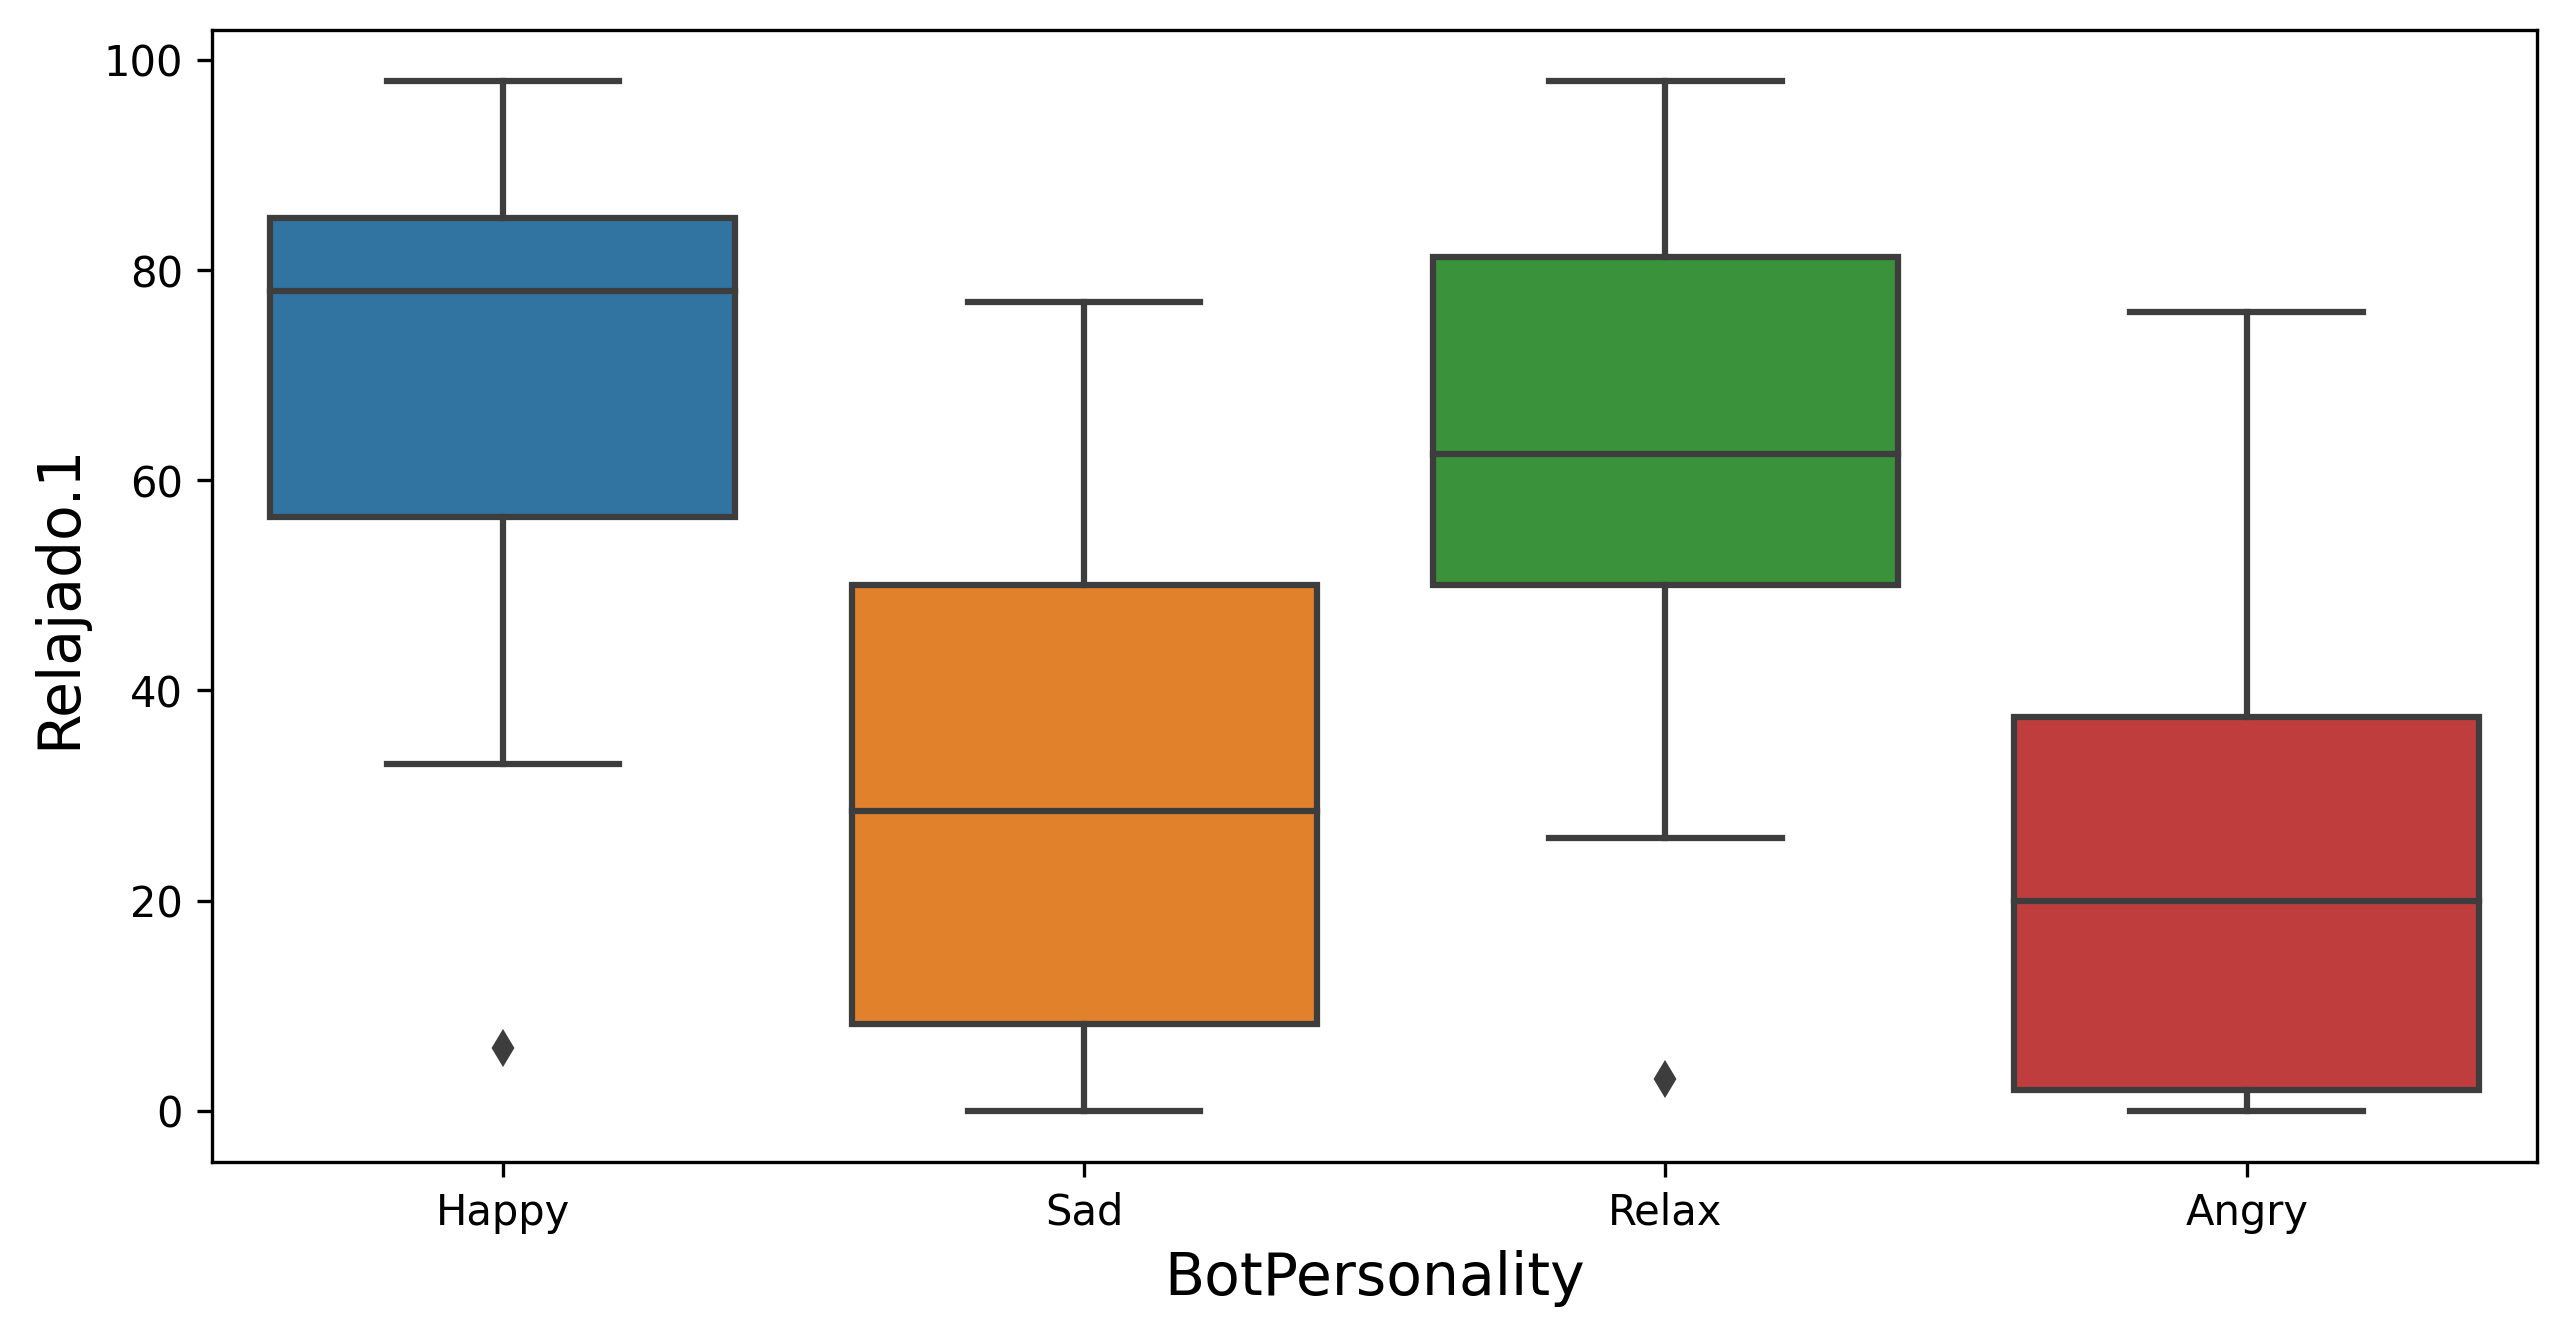

ANOVA P-value 6.019265152499084e-14 with significance ***
KS P-value 1.5735302591025833e-06 with significance ***

P-value 6.019265152499084e-14 with significance ***


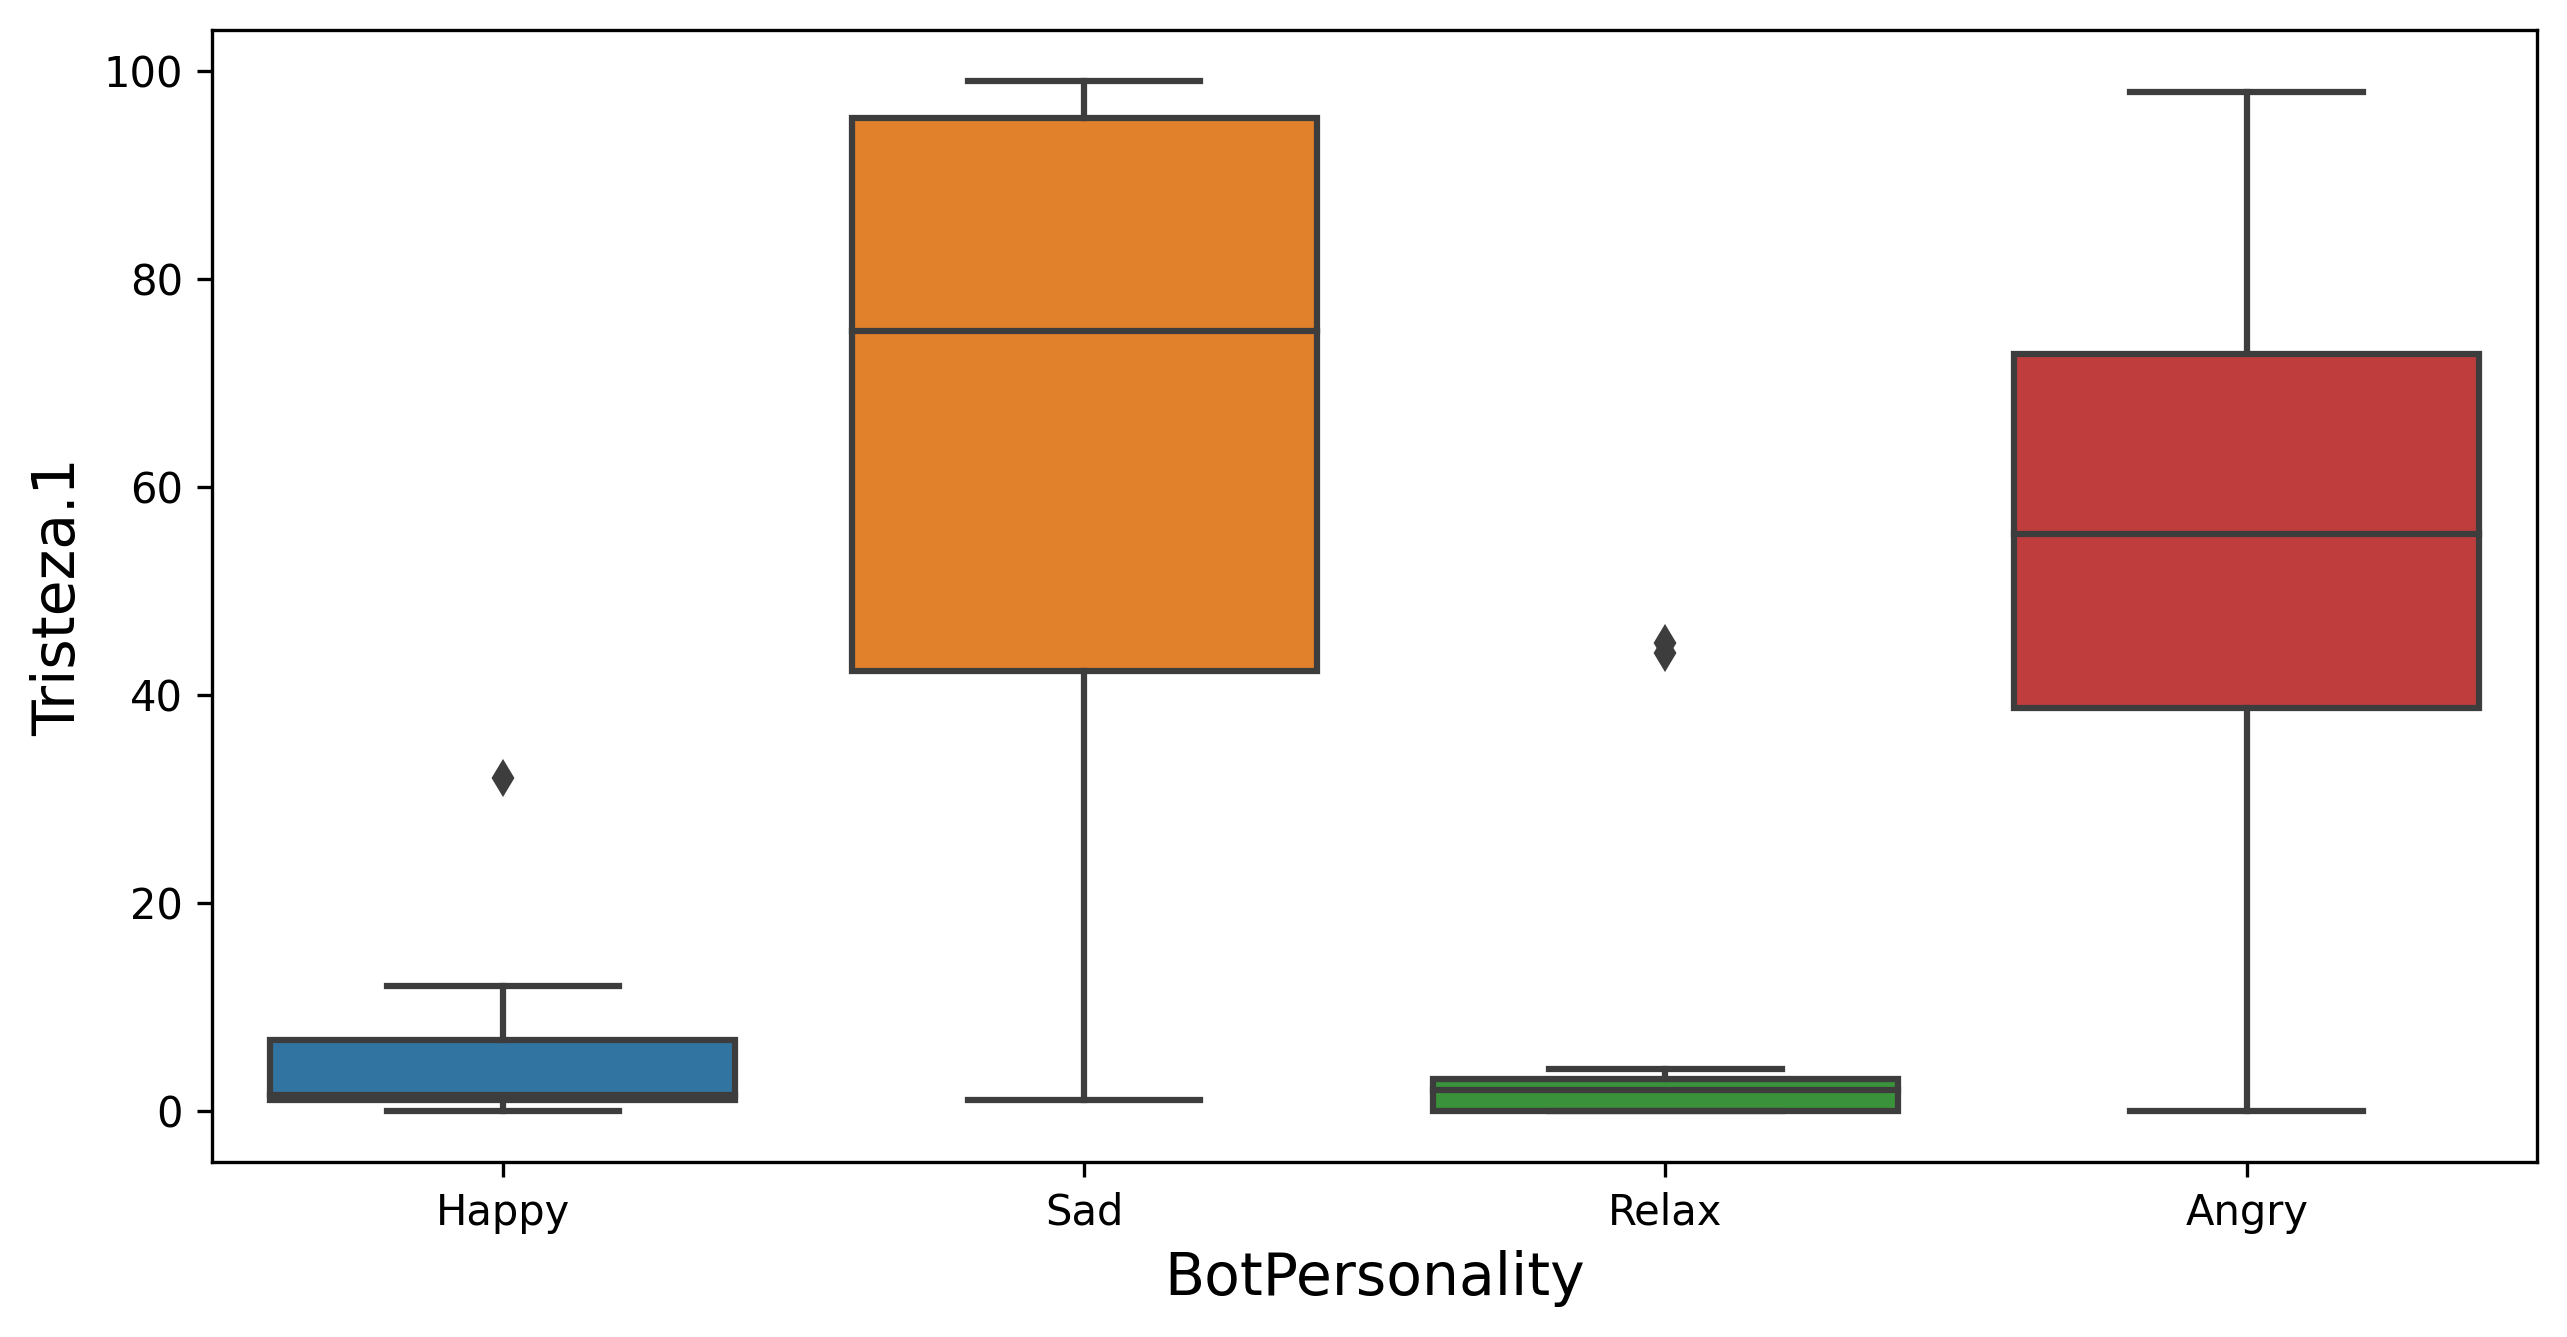

In [7]:
numerical_features = [
    'Disgusto', 'Felicidad', 'Enfado', 'Miedo', 'Relajado',
    'Sorpresa', 'Tristeza', 'Disgusto.1', 'Felicidad.1', 'Enfado.1',
    'Miedo.1', 'Relajado.1', 'Sorpresa.1', 'Tristeza.1'
]

for col in numerical_features:
    group_list = [df_g[col].tolist() for g, df_g in df_cp.groupby("BotPersonality")]
    _, p_value_anova = sp.stats.f_oneway(*group_list)
    _, p_value_ks = sp.stats.kstest(*group_list)
    if p_value_anova < 0.05 or p_value_ks < 0.05:
        print("ANOVA P-value", p_value_anova, "with significance", aute.get_p_string(p_value_anova))
        print("KS P-value", p_value_ks, "with significance", aute.get_p_string(p_value_ks))
        print()
        aute.make_binary_plot(data=df_cp, 
                              x_feat="BotPersonality", x_name="BotPersonality", 
                              y_feat=col, y_name=col)